In [308]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile
import io
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

In [309]:
def read_zip(zip_fn,extract_fn=None):
    zf=ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return{name:zf.read(name) for name in zf.namelist()}

In [310]:
df=pd.read_csv(io.BytesIO(read_zip(r"C:\Users\Rajesh\Downloads\ibm-hr-analytics-employee-attrition-performance (3).zip",'WA_Fn-UseC_-HR-Employee-Attrition.csv')))

In [311]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [312]:
df.shape

(1470, 35)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [314]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [315]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [316]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [317]:
df.drop('EmployeeCount', axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('Over18', axis=1, inplace=True)

df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

In [318]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [319]:
df.shape

(1470, 31)

In [320]:
df.loc[df['Attrition']==' ']

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]

In [321]:
n_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
       n_column.append(i)
print(n_column)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [322]:
c_column=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
       c_column.append(i)
print(c_column)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


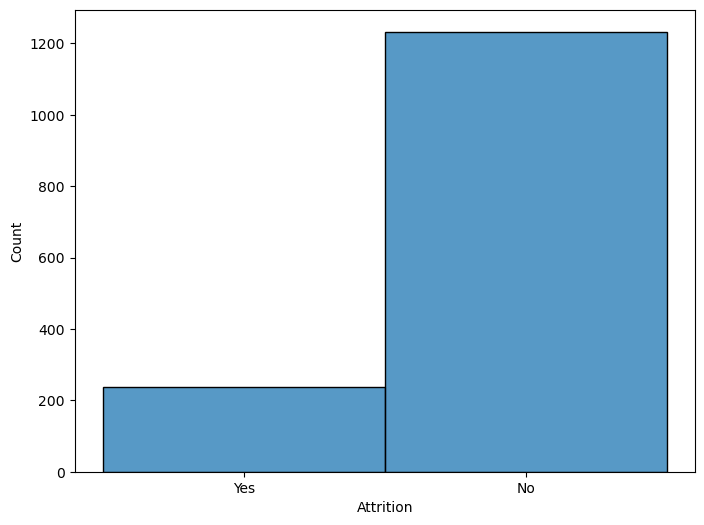

In [323]:
plt.figure(figsize=(8,6))
sns.histplot(df['Attrition'])
plt.show()

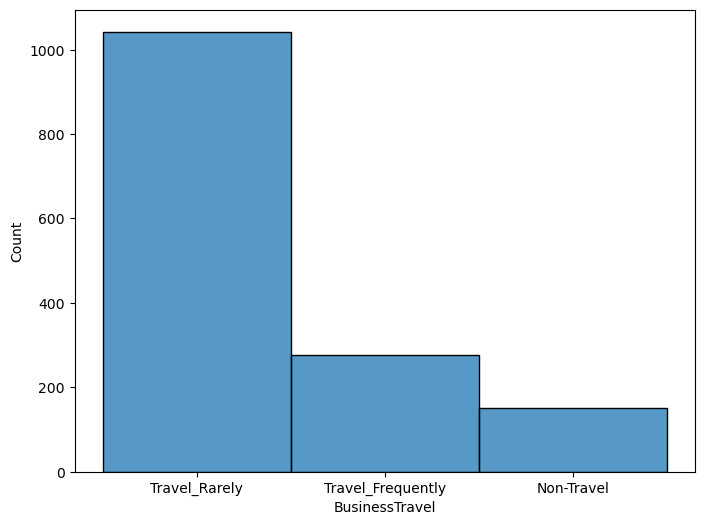

In [324]:
plt.figure(figsize=(8,6))
sns.histplot(df['BusinessTravel'])
plt.show()

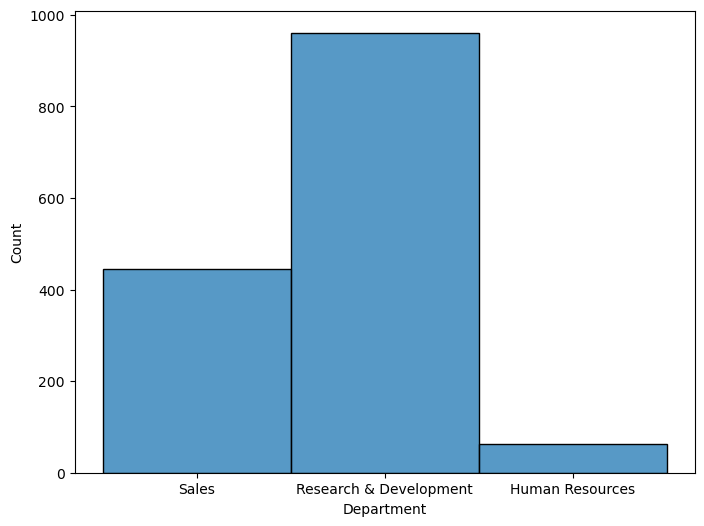

In [325]:
plt.figure(figsize=(8,6))
sns.histplot(df['Department'])
plt.show()

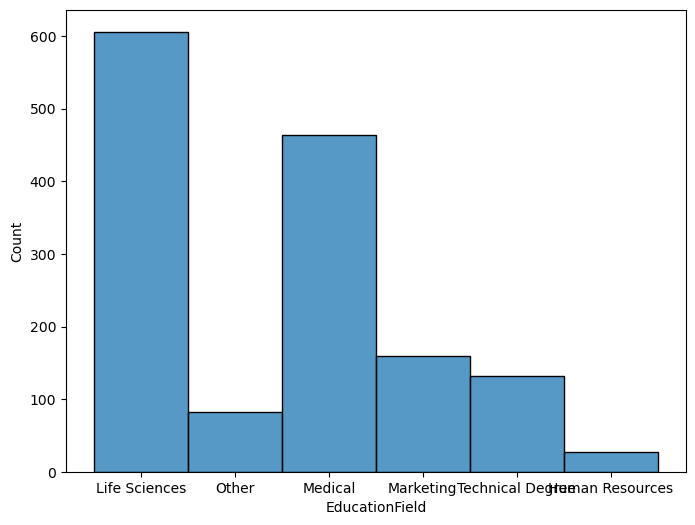

In [326]:
plt.figure(figsize=(8,6))
sns.histplot(df['EducationField'])
plt.show()

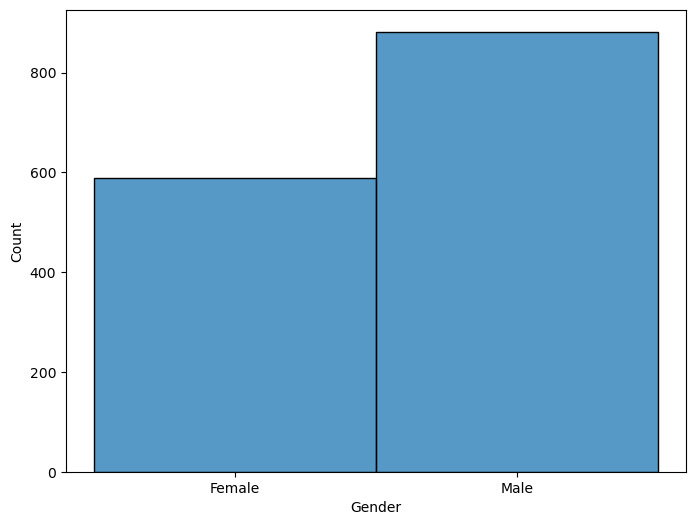

In [327]:
plt.figure(figsize=(8,6))
sns.histplot(df['Gender'])
plt.show()

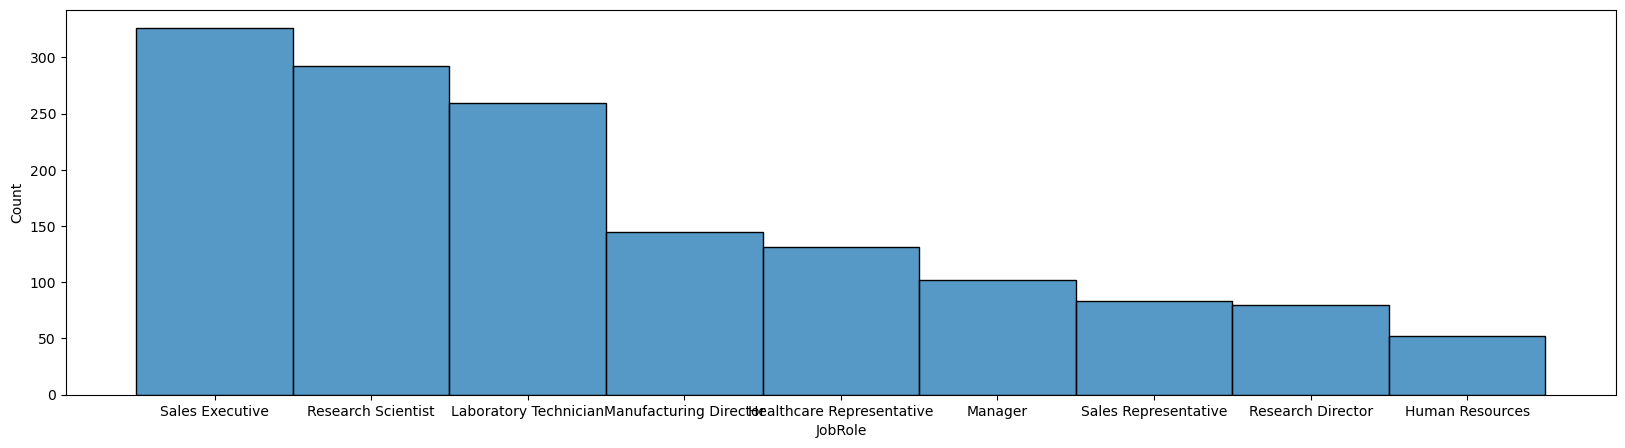

In [328]:
plt.figure(figsize=(20,5))
sns.histplot(df['JobRole'])
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


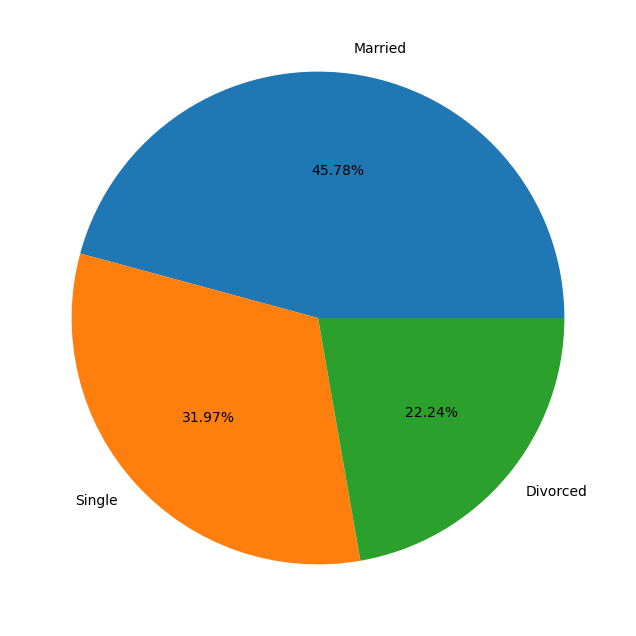

In [329]:
print(df['MaritalStatus'].value_counts())
labels='Married','Single','Divorced'
fig,ax=plt.subplots(figsize=(8,8))
ax.pie(df['MaritalStatus'].value_counts(),labels=labels,autopct='%1.2f%%')
plt.show()

<Figure size 800x600 with 0 Axes>

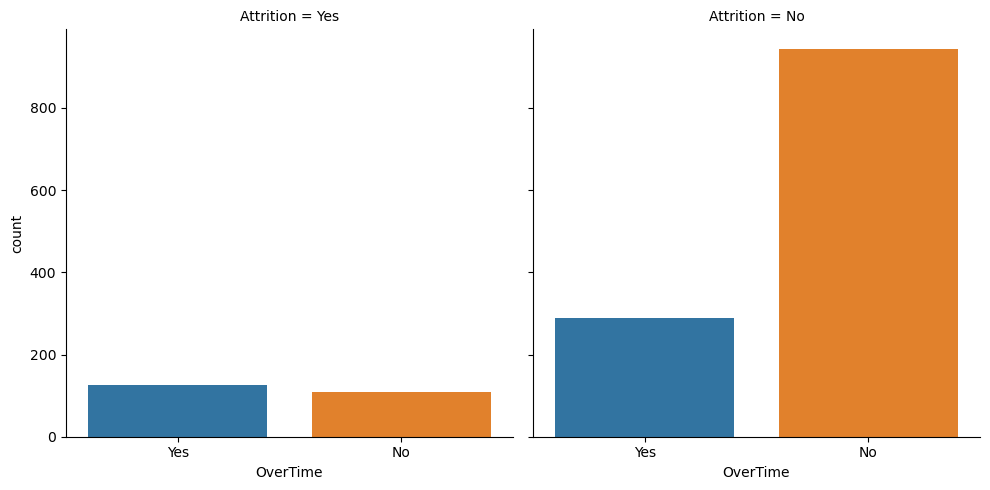

In [330]:
plt.figure(figsize=(8,6))
sns.catplot(x='OverTime',col='Attrition',data=df,kind='count')
plt.show()

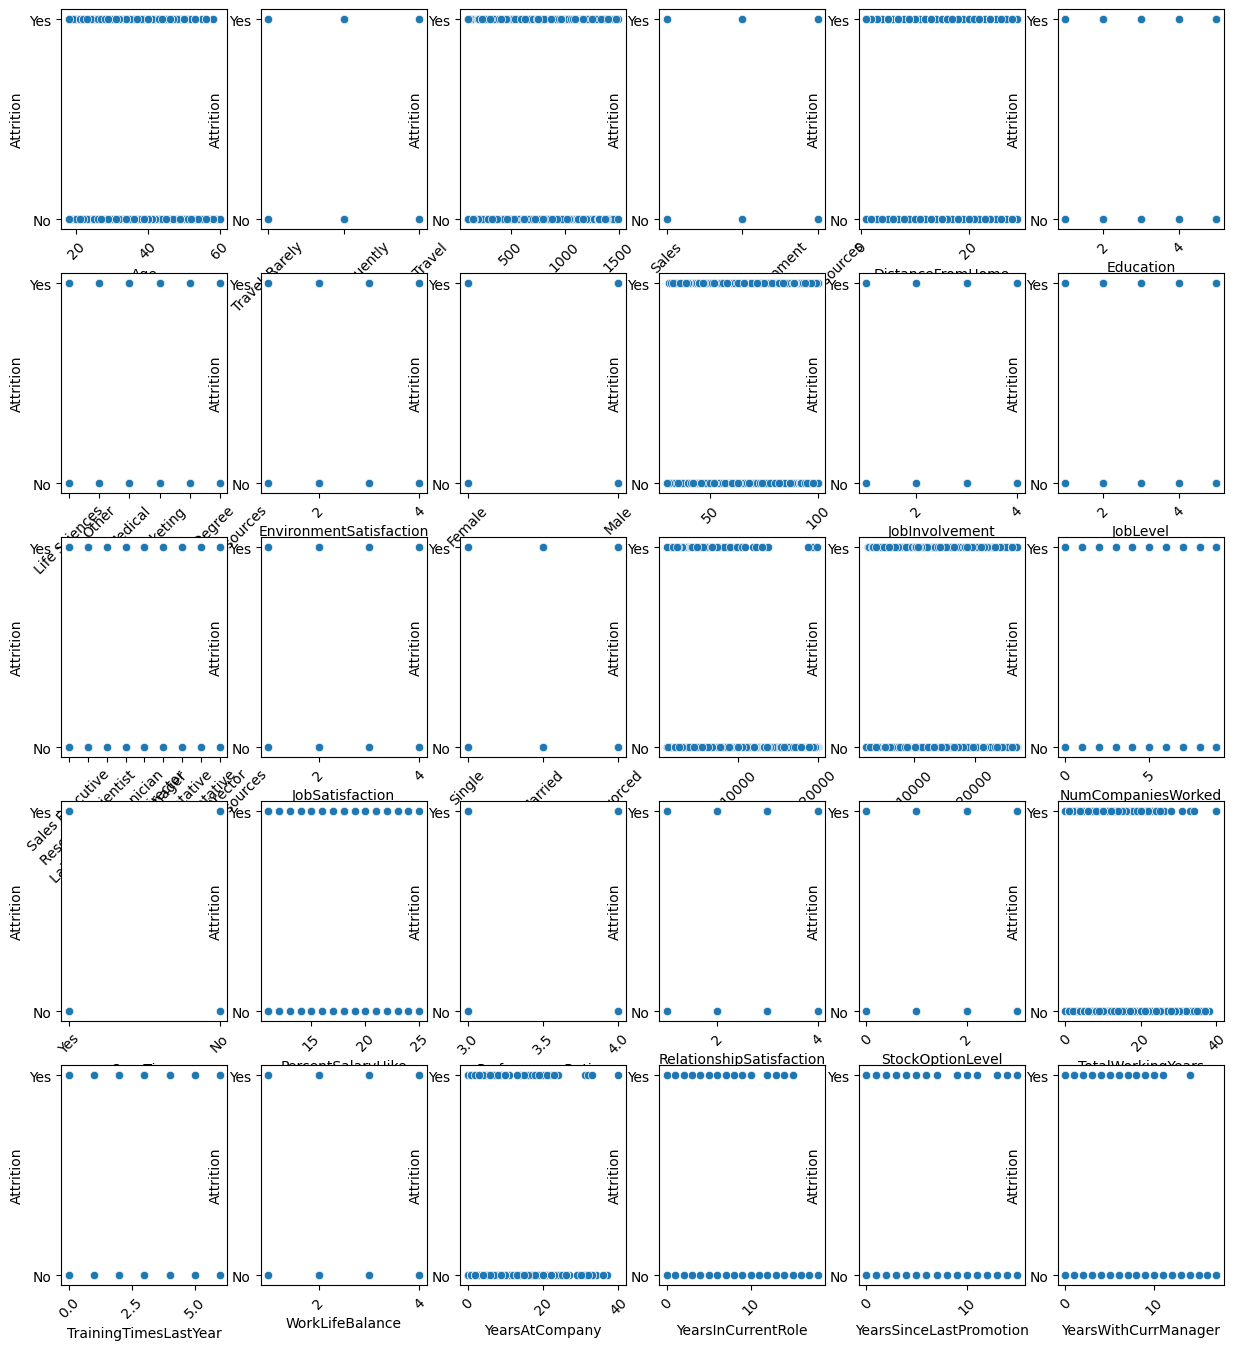

In [331]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']
plt.figure(figsize=(15,20))
p=1
for i in x:
    if p<31:
        plt.subplot(6,6,p)
        sns.scatterplot(x=x[i],y=y)
        plt.xticks(rotation=45)
        plt.xlabel(i)
        plt.ylabel('Attrition')
    p+=1
plt.show()

Text(0.5, 1.0, 'Attrition and Age')

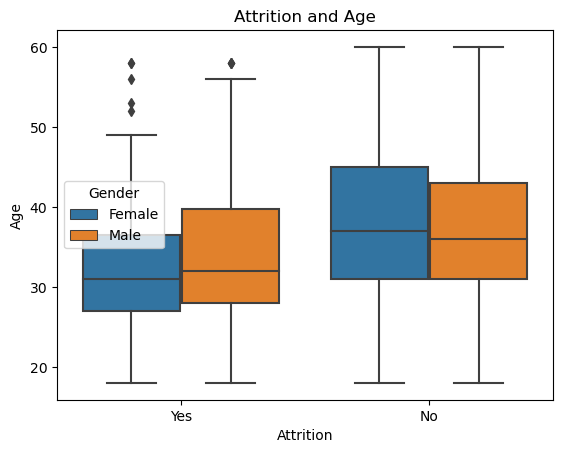

In [332]:
sns.boxplot(x='Attrition',y='Age',data=df,hue='Gender')
plt.title("Attrition and Age")

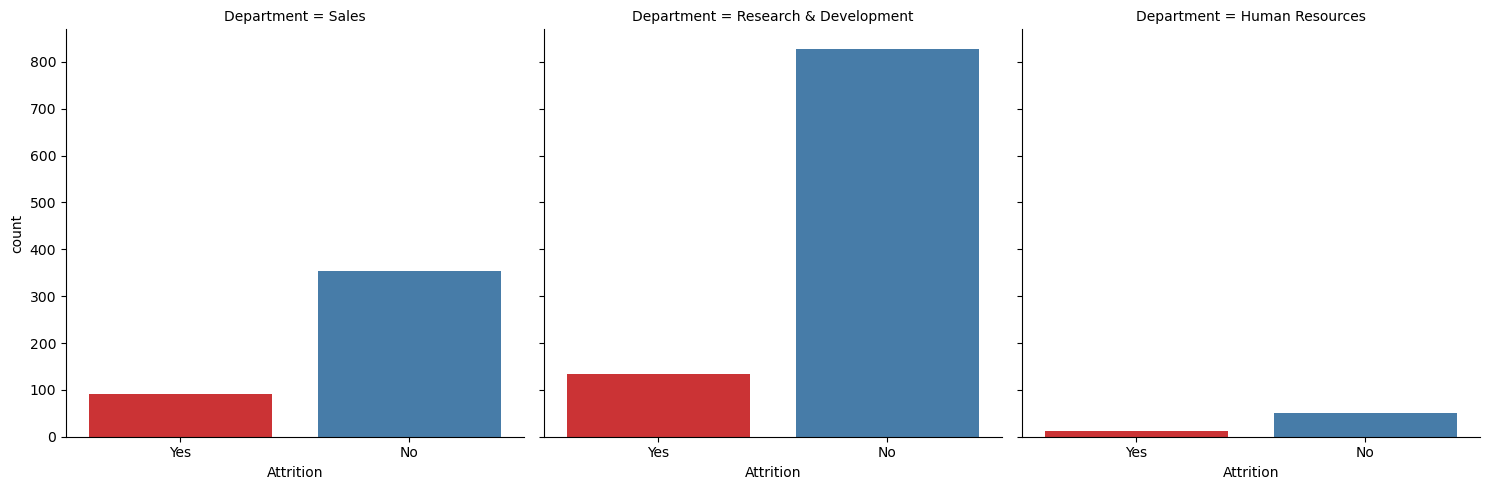

In [333]:
sns.catplot(x='Attrition',col='Department',data=df,kind='count',palette='Set1')

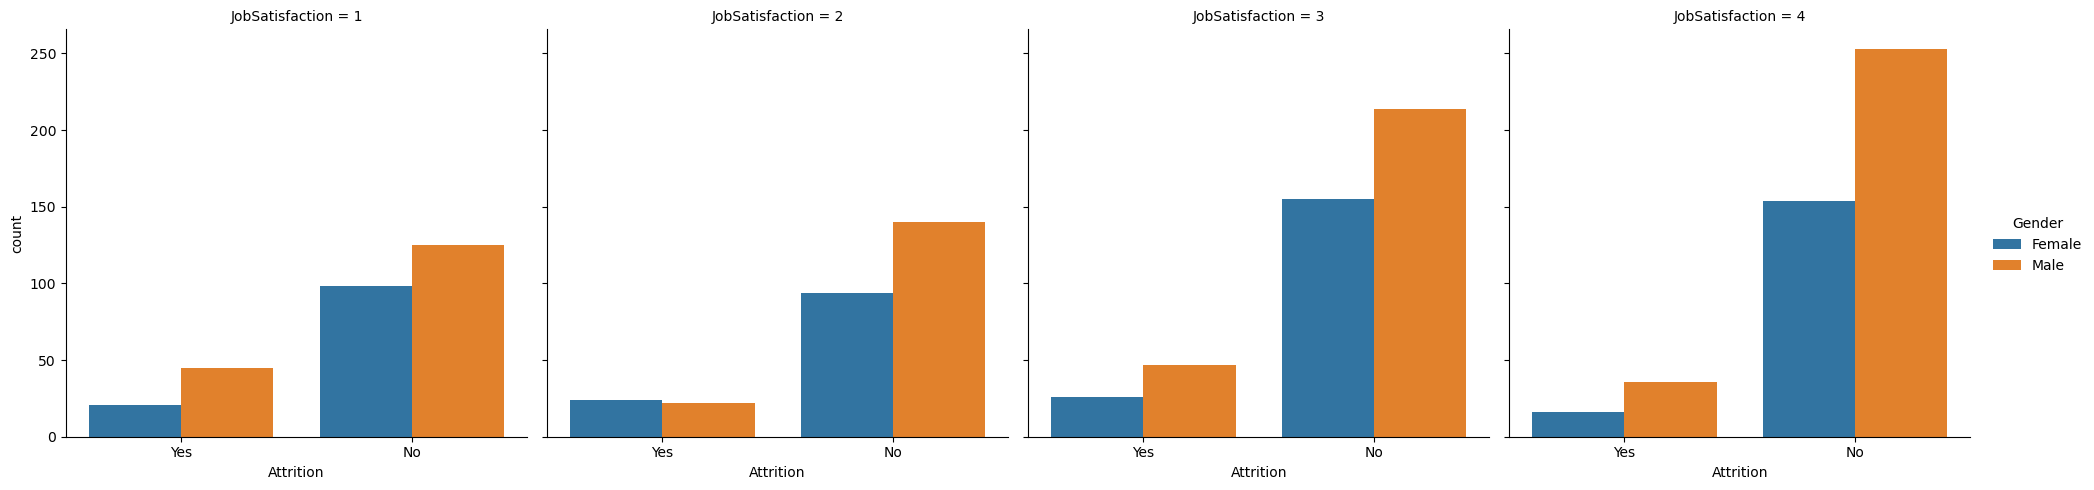

In [334]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction',hue='Gender')


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Text(0.5, 1.0, 'Attration and BusinessTravel')

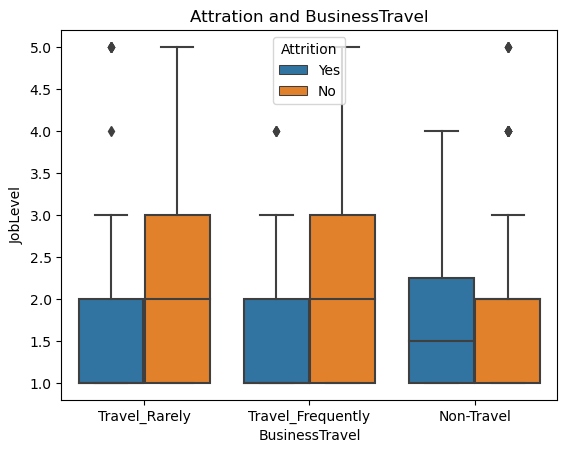

In [335]:
print(df['BusinessTravel'].value_counts())
sns.boxplot(x='BusinessTravel',y='JobLevel',data=df,hue='Attrition')
plt.title('Attration and BusinessTravel')

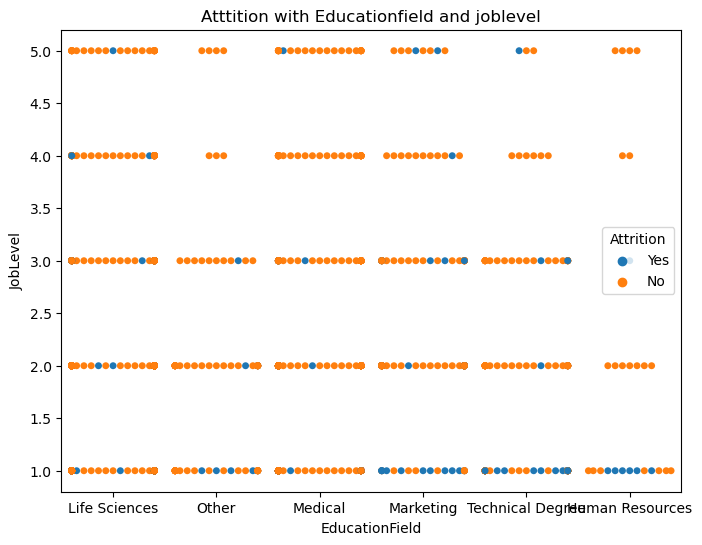

In [336]:
plt.figure(figsize=(8,6))
plt.title('Atttition with Educationfield and joblevel')
sns.swarmplot(x='EducationField',y='JobLevel',hue='Attrition',data=df)
plt.show()

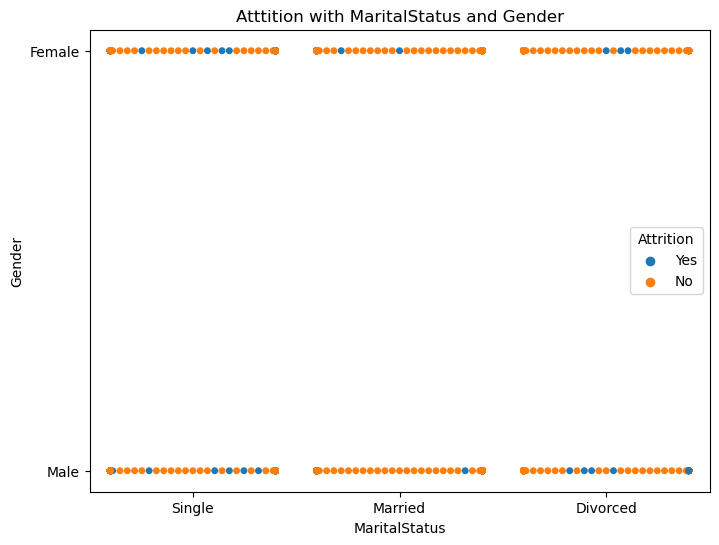

In [337]:
plt.figure(figsize=(8,6))
plt.title('Atttition with MaritalStatus and Gender')
sns.swarmplot(x=df['MaritalStatus'],y=df['Gender'],hue=df['Attrition'],data=df)
plt.show()

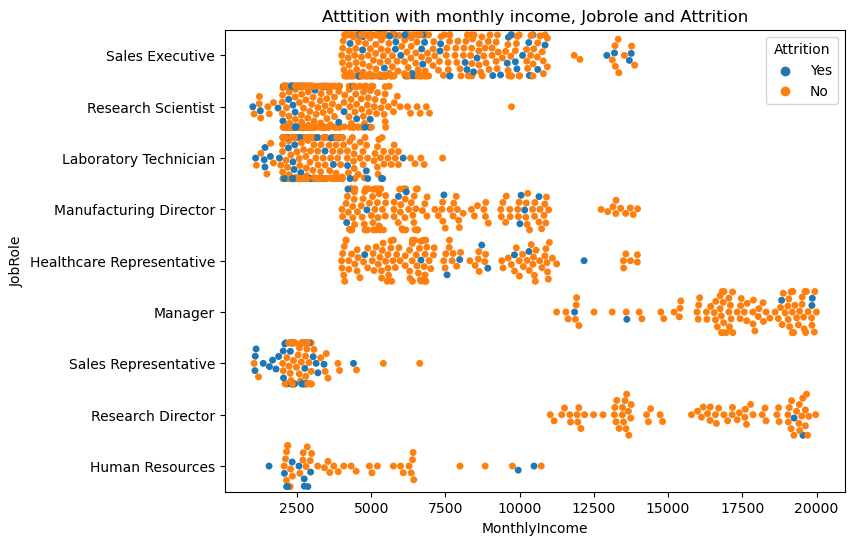

In [338]:
plt.figure(figsize=(8,6))
plt.title('Atttition with monthly income, Jobrole and Attrition')
sns.swarmplot(x=df['MonthlyIncome'],y=df['JobRole'],hue=df['Attrition'],data=df)
plt.show()

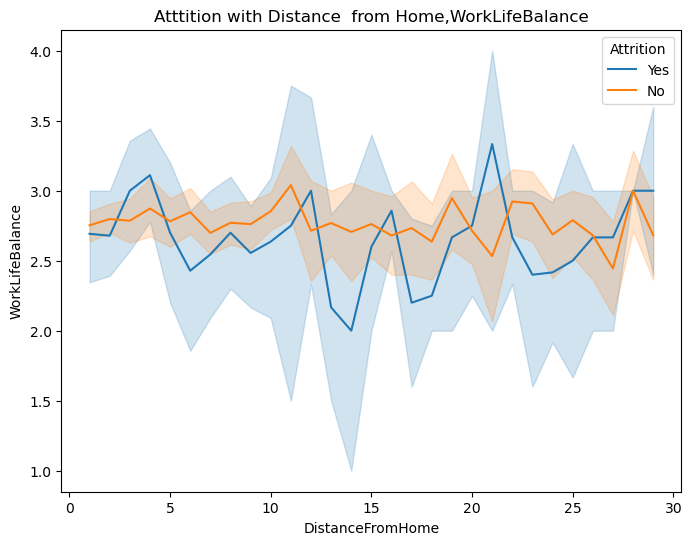

In [339]:
plt.figure(figsize=(8,6))
plt.title('Atttition with Distance  from Home,WorkLifeBalance')
sns.lineplot(x=df['DistanceFromHome'],y=df['WorkLifeBalance'],hue=df['Attrition'],data=df)
plt.show()


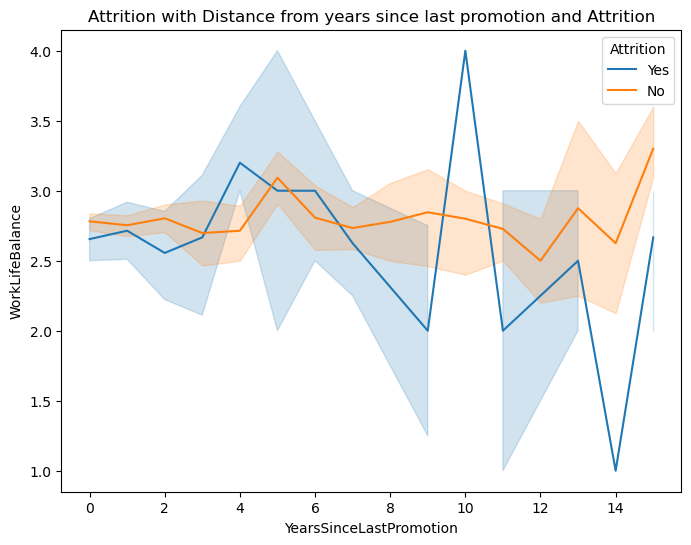

In [340]:
plt.figure(figsize=(8,6))
plt.title('Attrition with Distance from years since last promotion and Attrition')
sns.lineplot(x=df['YearsSinceLastPromotion'],y=df['WorkLifeBalance'],hue=df['Attrition'],data=df)
plt.show()

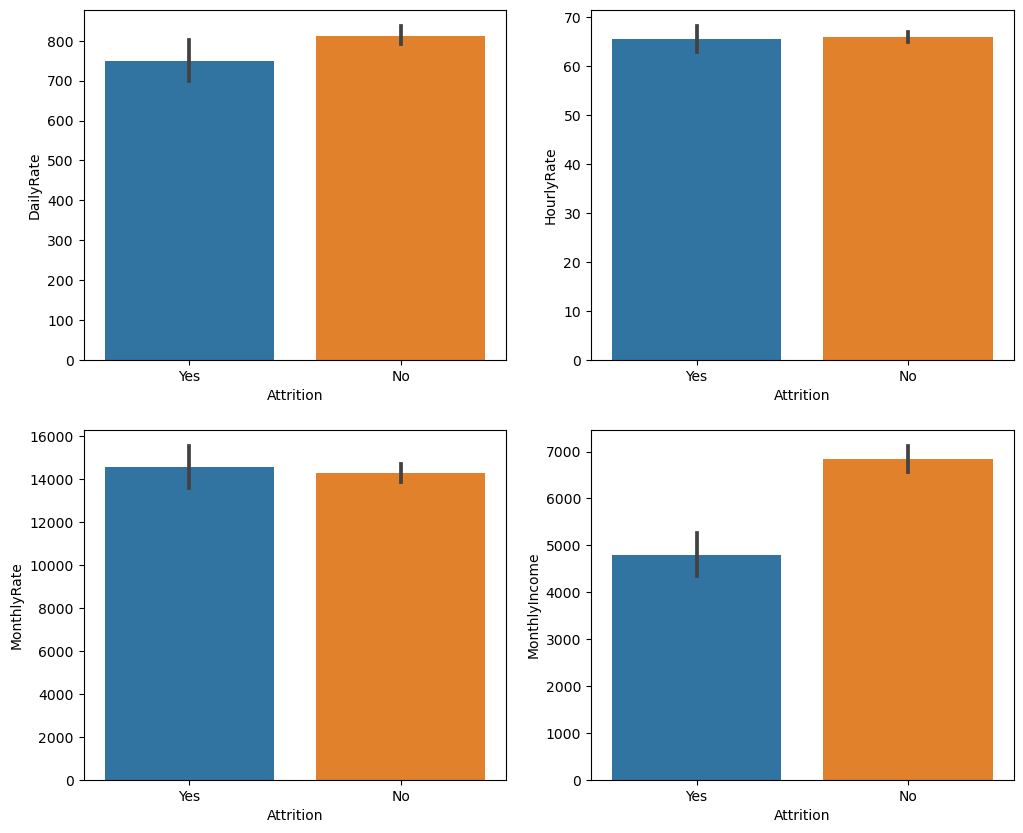

In [341]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.barplot(x='Attrition',y='DailyRate',ax=axes[0,0],data=df)
sns.barplot(x='Attrition',y='HourlyRate',ax=axes[0,1],data=df)
sns.barplot(x='Attrition',y='MonthlyRate',ax=axes[1,0],data=df)
sns.barplot(x='Attrition',y='MonthlyIncome',ax=axes[1,1],data=df)

plt.show()

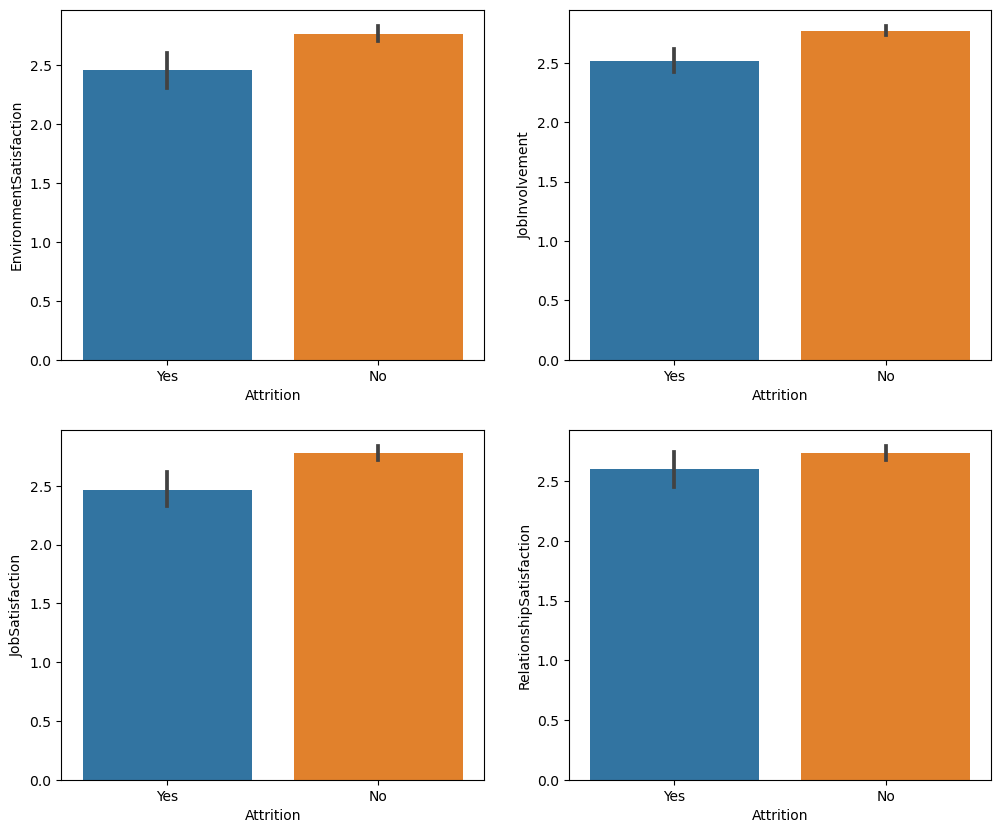

In [342]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',ax=axes[0,0],data=df)
sns.barplot(x='Attrition',y='JobInvolvement',ax=axes[0,1],data=df)
sns.barplot(x='Attrition',y='JobSatisfaction',ax=axes[1,0],data=df)
sns.barplot(x='Attrition',y='RelationshipSatisfaction',ax=axes[1,1],data=df)

plt.show()

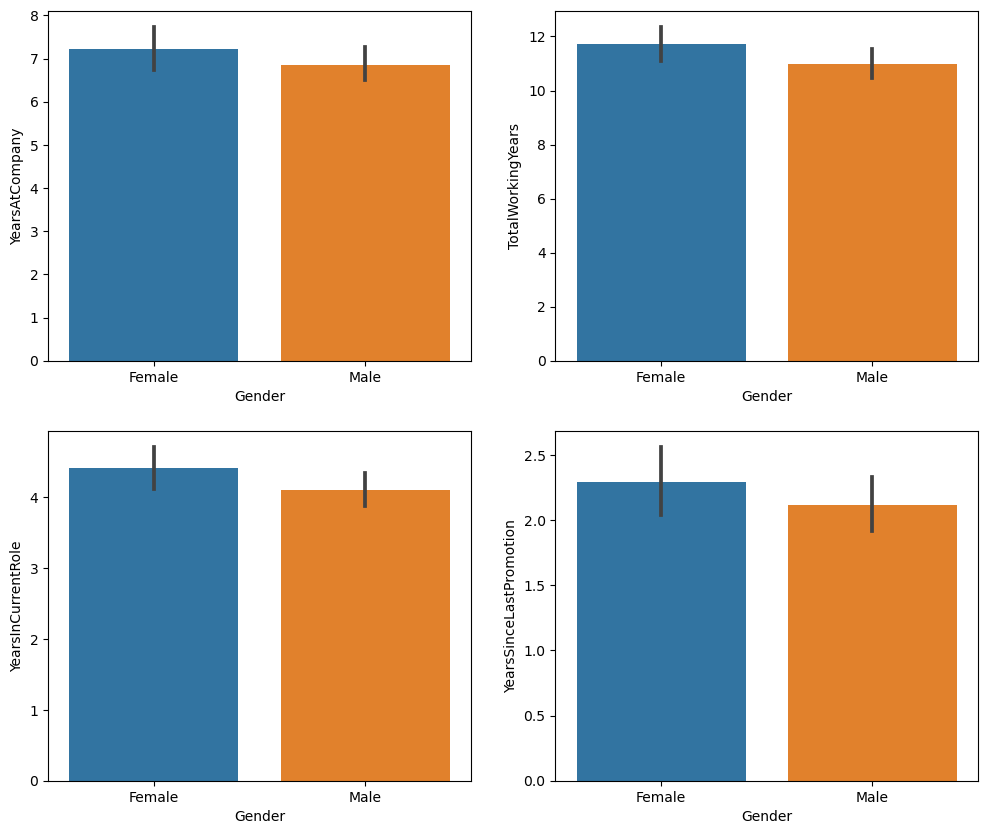

In [343]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.barplot(x='Gender',y='YearsAtCompany',ax=axes[0,0],data=df)
sns.barplot(x='Gender',y='TotalWorkingYears',ax=axes[0,1],data=df)
sns.barplot(x='Gender',y='YearsInCurrentRole',ax=axes[1,0],data=df)
sns.barplot(x='Gender',y='YearsSinceLastPromotion',ax=axes[1,1],data=df)

plt.show()

3    1244
4     226
Name: PerformanceRating, dtype: int64


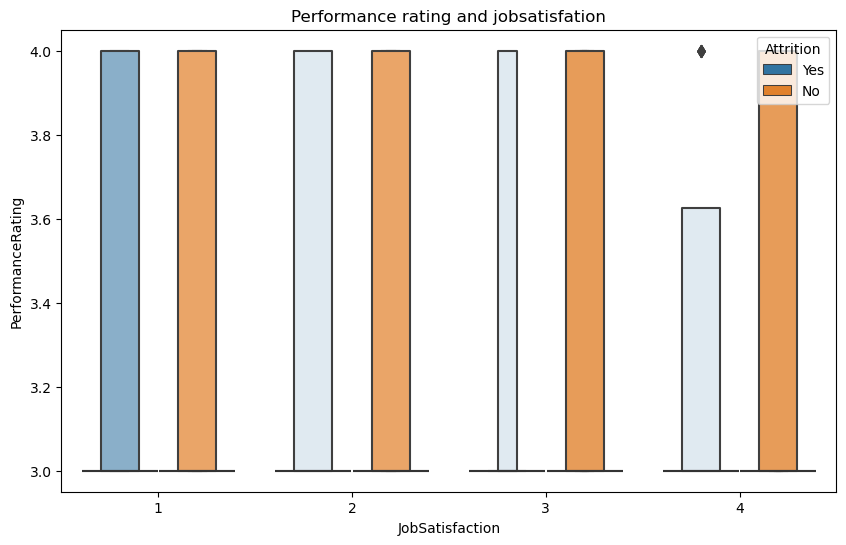

In [344]:
print(df['PerformanceRating'].value_counts())
plt.figure(figsize=(10,6))
sns.boxenplot(x='JobSatisfaction',y='PerformanceRating',data=df,hue='Attrition')
plt.title('Performance rating and jobsatisfation')
plt.show()

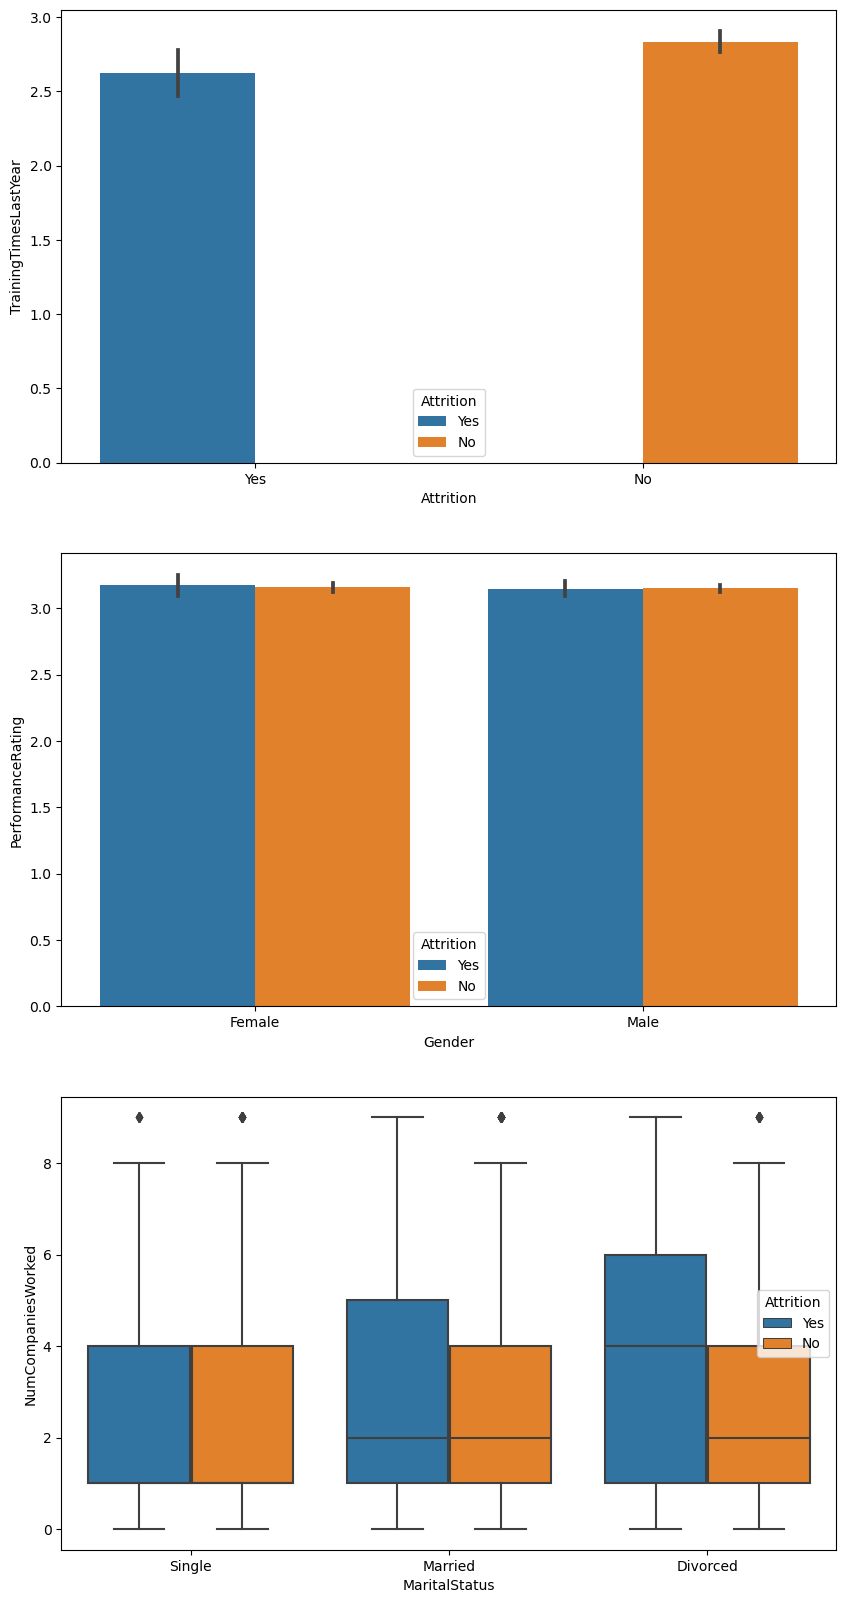

In [345]:
fig,axes=plt.subplots(3,1,figsize=(10,20))
sns.barplot(x='Attrition',y='TrainingTimesLastYear',ax=axes[0],hue='Attrition',data=df)
sns.barplot(x='Gender',y='PerformanceRating',ax=axes[1],hue='Attrition',data=df)
sns.boxplot(x='MaritalStatus',y='NumCompaniesWorked',ax=axes[2],hue='Attrition',data=df)

plt.show()

In [346]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

<Axes: >

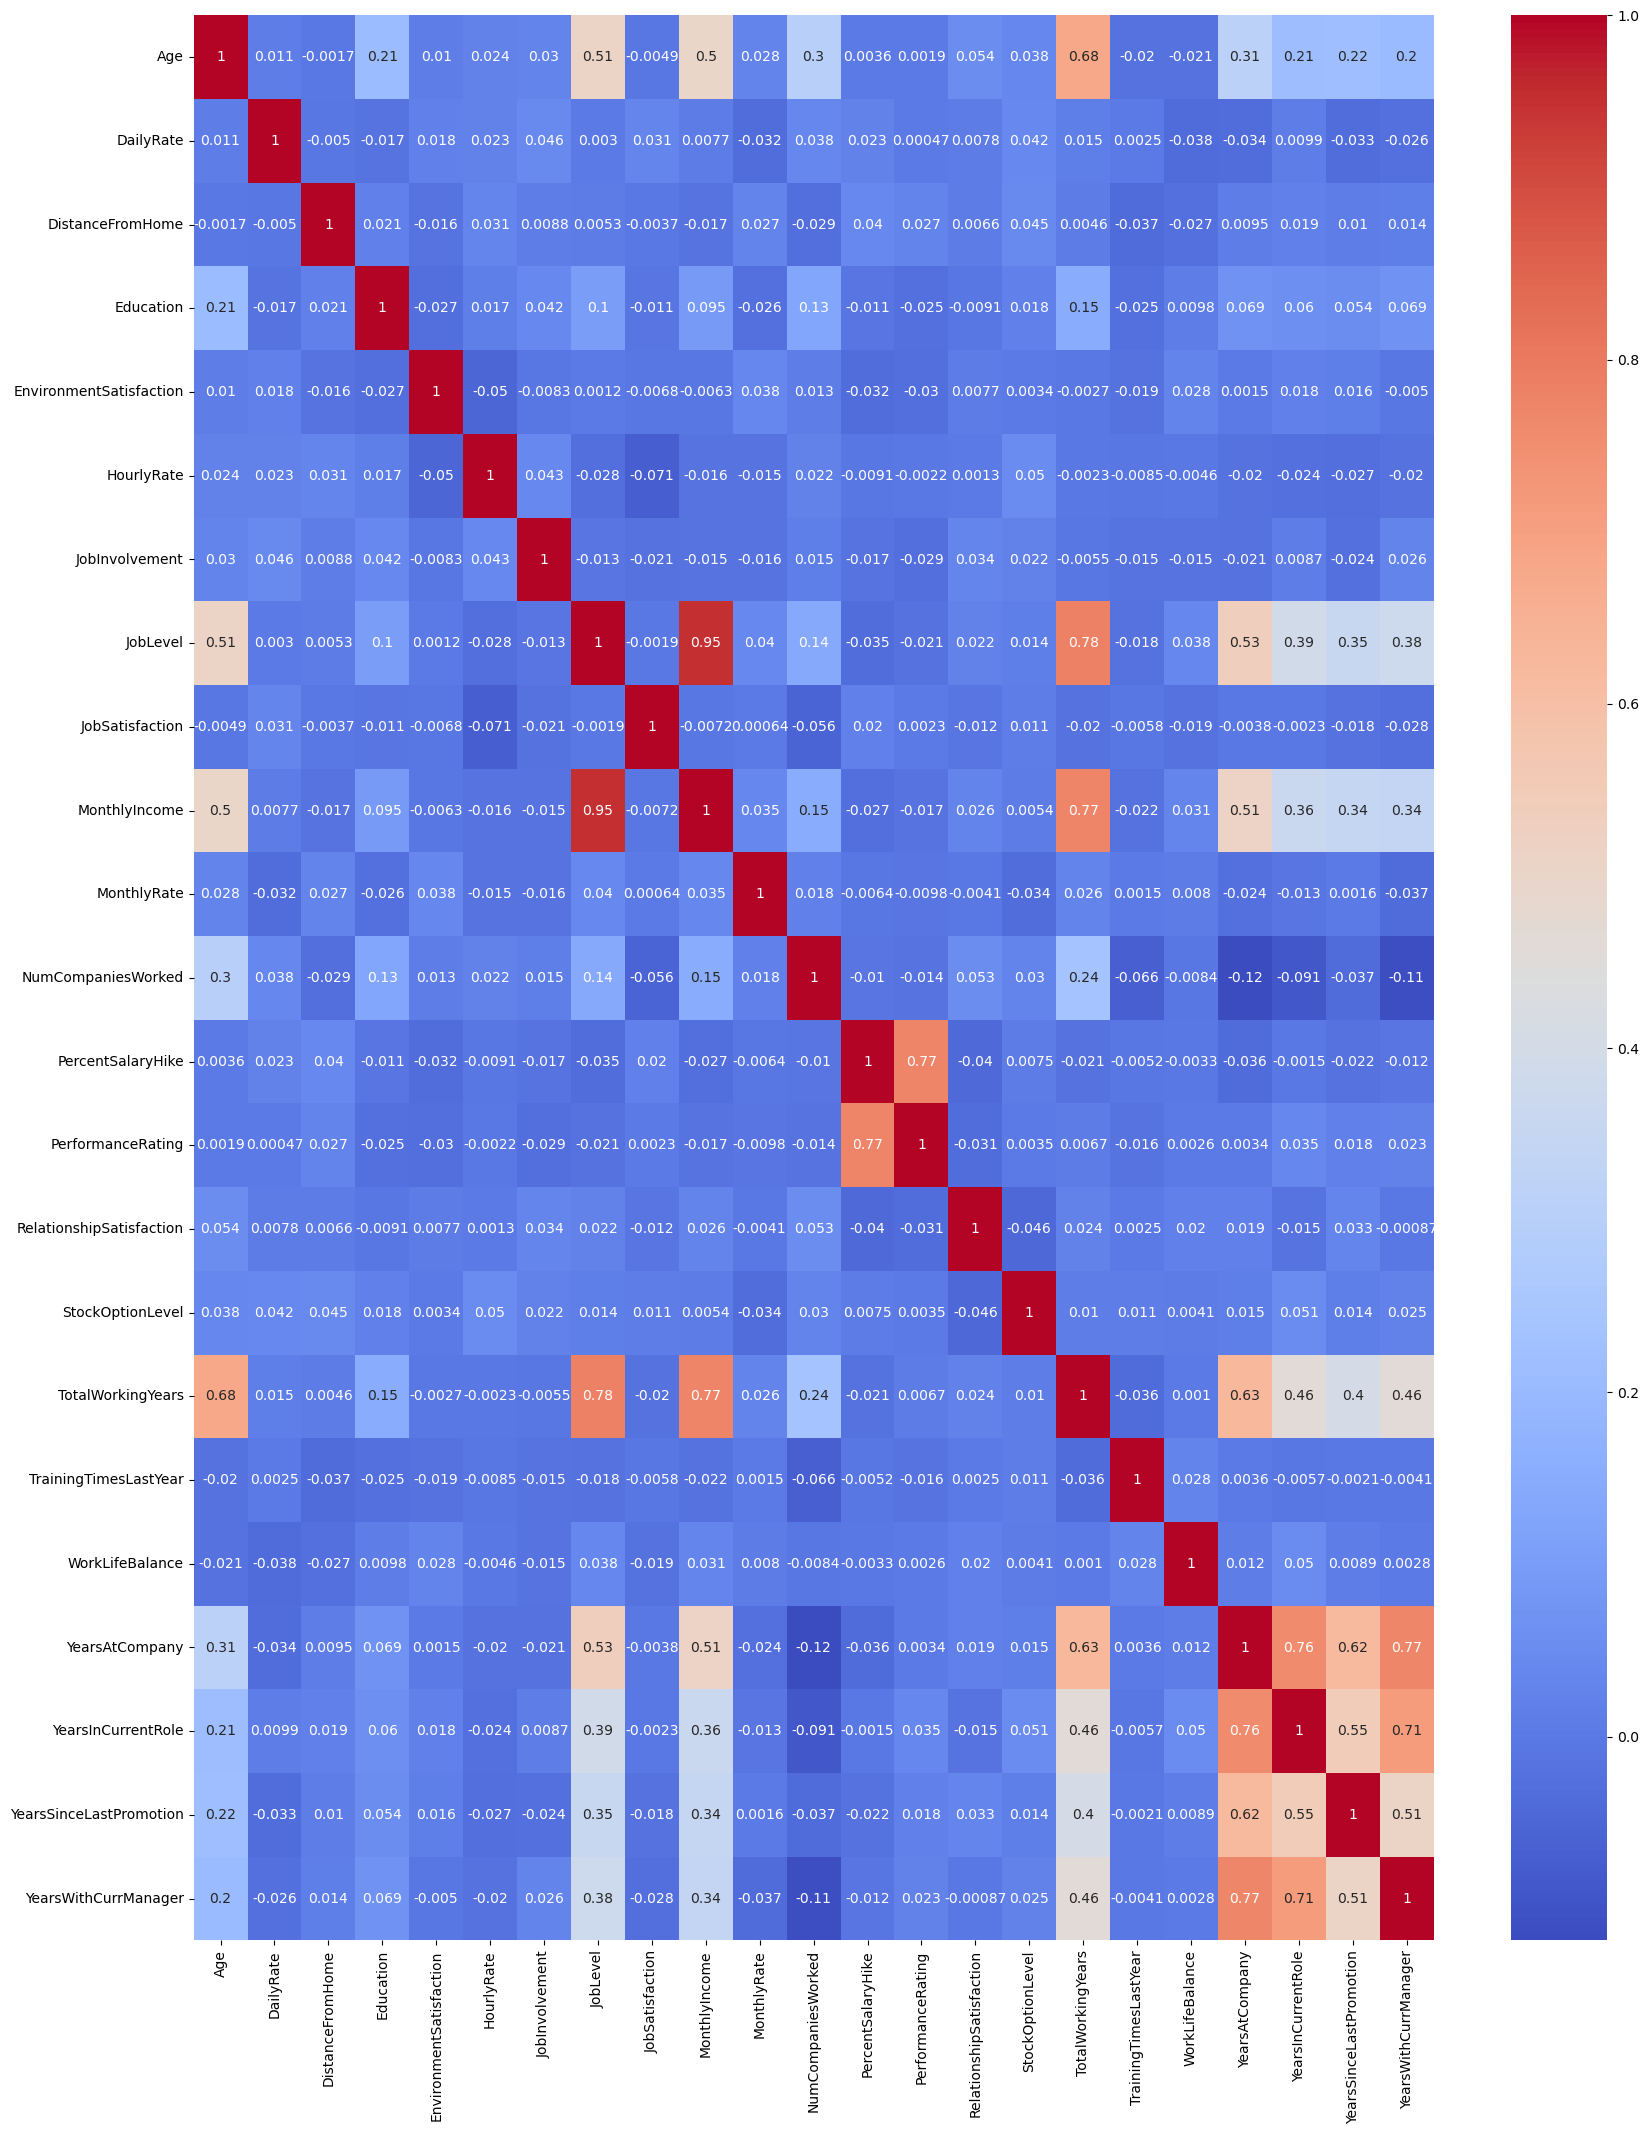

In [347]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

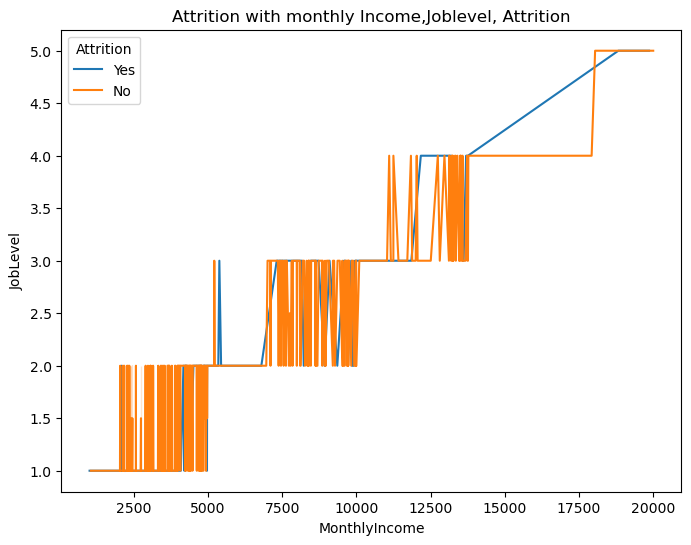

In [348]:
plt.figure(figsize=(8,6))
plt.title('Attrition with monthly Income,Joblevel, Attrition')
sns.lineplot(x=df['MonthlyIncome'],y=df['JobLevel'],hue=df['Attrition'],data=df)
plt.show()


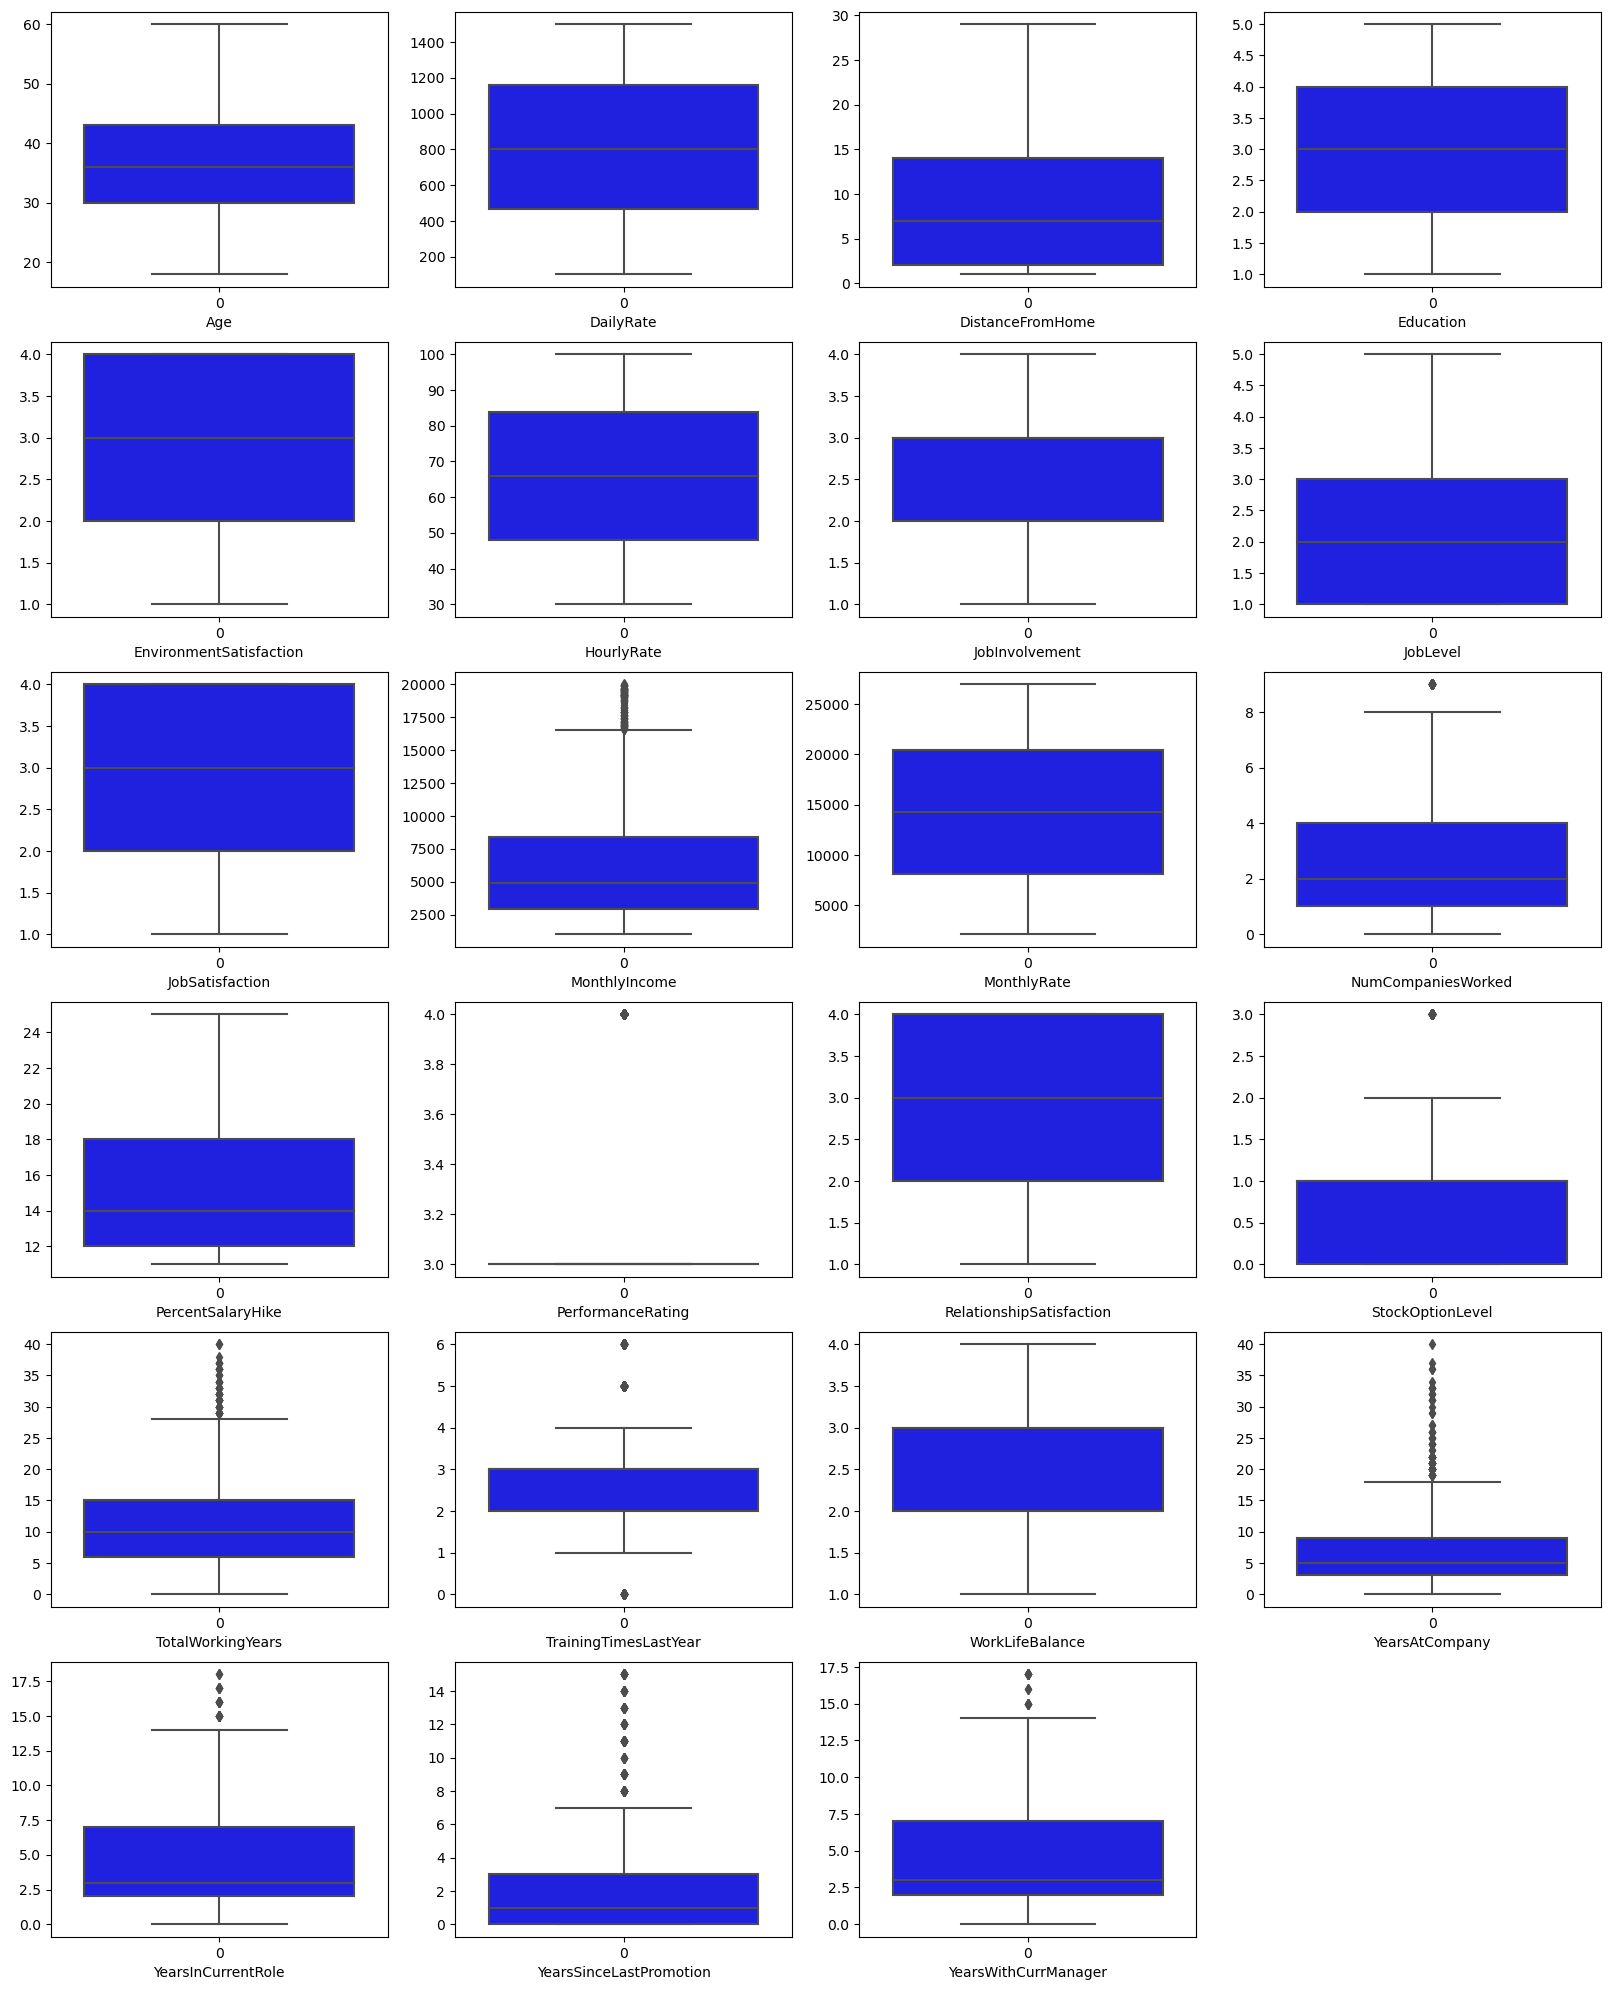

In [349]:
plt.figure(figsize=(20,25))
ptnum=1
for column in n_column:
    if ptnum<=24:
        ax=plt.subplot(6,4,ptnum)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column)
    ptnum+=1
plt.show()

In [357]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [358]:
feature_cols=df[['MonthlyIncome', 'NumCompaniesWorked',  'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']]
from scipy.stats import zscore
z=np.abs(zscore(feature_cols))
z

MonthlyIncome  NumCompaniesWorked  PerformanceRating  StockOptionLevel  \
0          0.108350            2.125136           0.426230          0.932014   
1          0.291719            0.678049           2.346151          0.241988   
2          0.937654            1.324226           0.426230          0.932014   
3          0.763634            0.678049           0.426230          0.932014   
4          0.644858            2.525591           0.426230          0.241988   
...             ...                 ...                ...               ...   
1465       0.835451            0.523316           0.426230          0.241988   
1466       0.741140            0.523316           0.426230          0.241988   
1467       0.076690            0.678049           2.346151          0.241988   
1468       0.236474            0.277594           0.426230          0.932014   
1469       0.445978            0.277594           0.426230          0.932014   

      TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0              0.421642               2.171982        0.164613   
1              0.164511               0.155707        0.488508   
2              0.550208               0.155707        1.144294   
3              0.421642               0.155707        0.161947   
4              0.678774               0.155707        0.817734   
...                 ...                    ...             ...   
1465           0.735447               0.155707        0.327893   
1466           0.293077               1.707500        0.001333   
1467           0.678774               2.171982        0.164613   
1468           0.735447               0.155707        0.325228   
1469           0.678774               0.155707        0.491174   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0               0.063296                 0.679146              0.245834  
1               0.764998                 0.368715              0.806541  
2               1.167687                 0.679146              1.155935  
3               0.764998                 0.252146              1.155935  
4               0.615492                 0.058285              0.595227  
...                  ...                      ...                   ...  
1465            0.615492                 0.679146              0.314873  
1466            0.764998                 0.368715              0.806541  
1467            0.615492                 0.679146              0.314873  
1468            0.488900                 0.679146              1.086895  
1469            0.339394                 0.368715              0.595227  

[1470 rows x 10 columns]

In [359]:
new_df=df[(z<3).all(axis=1)]
new_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

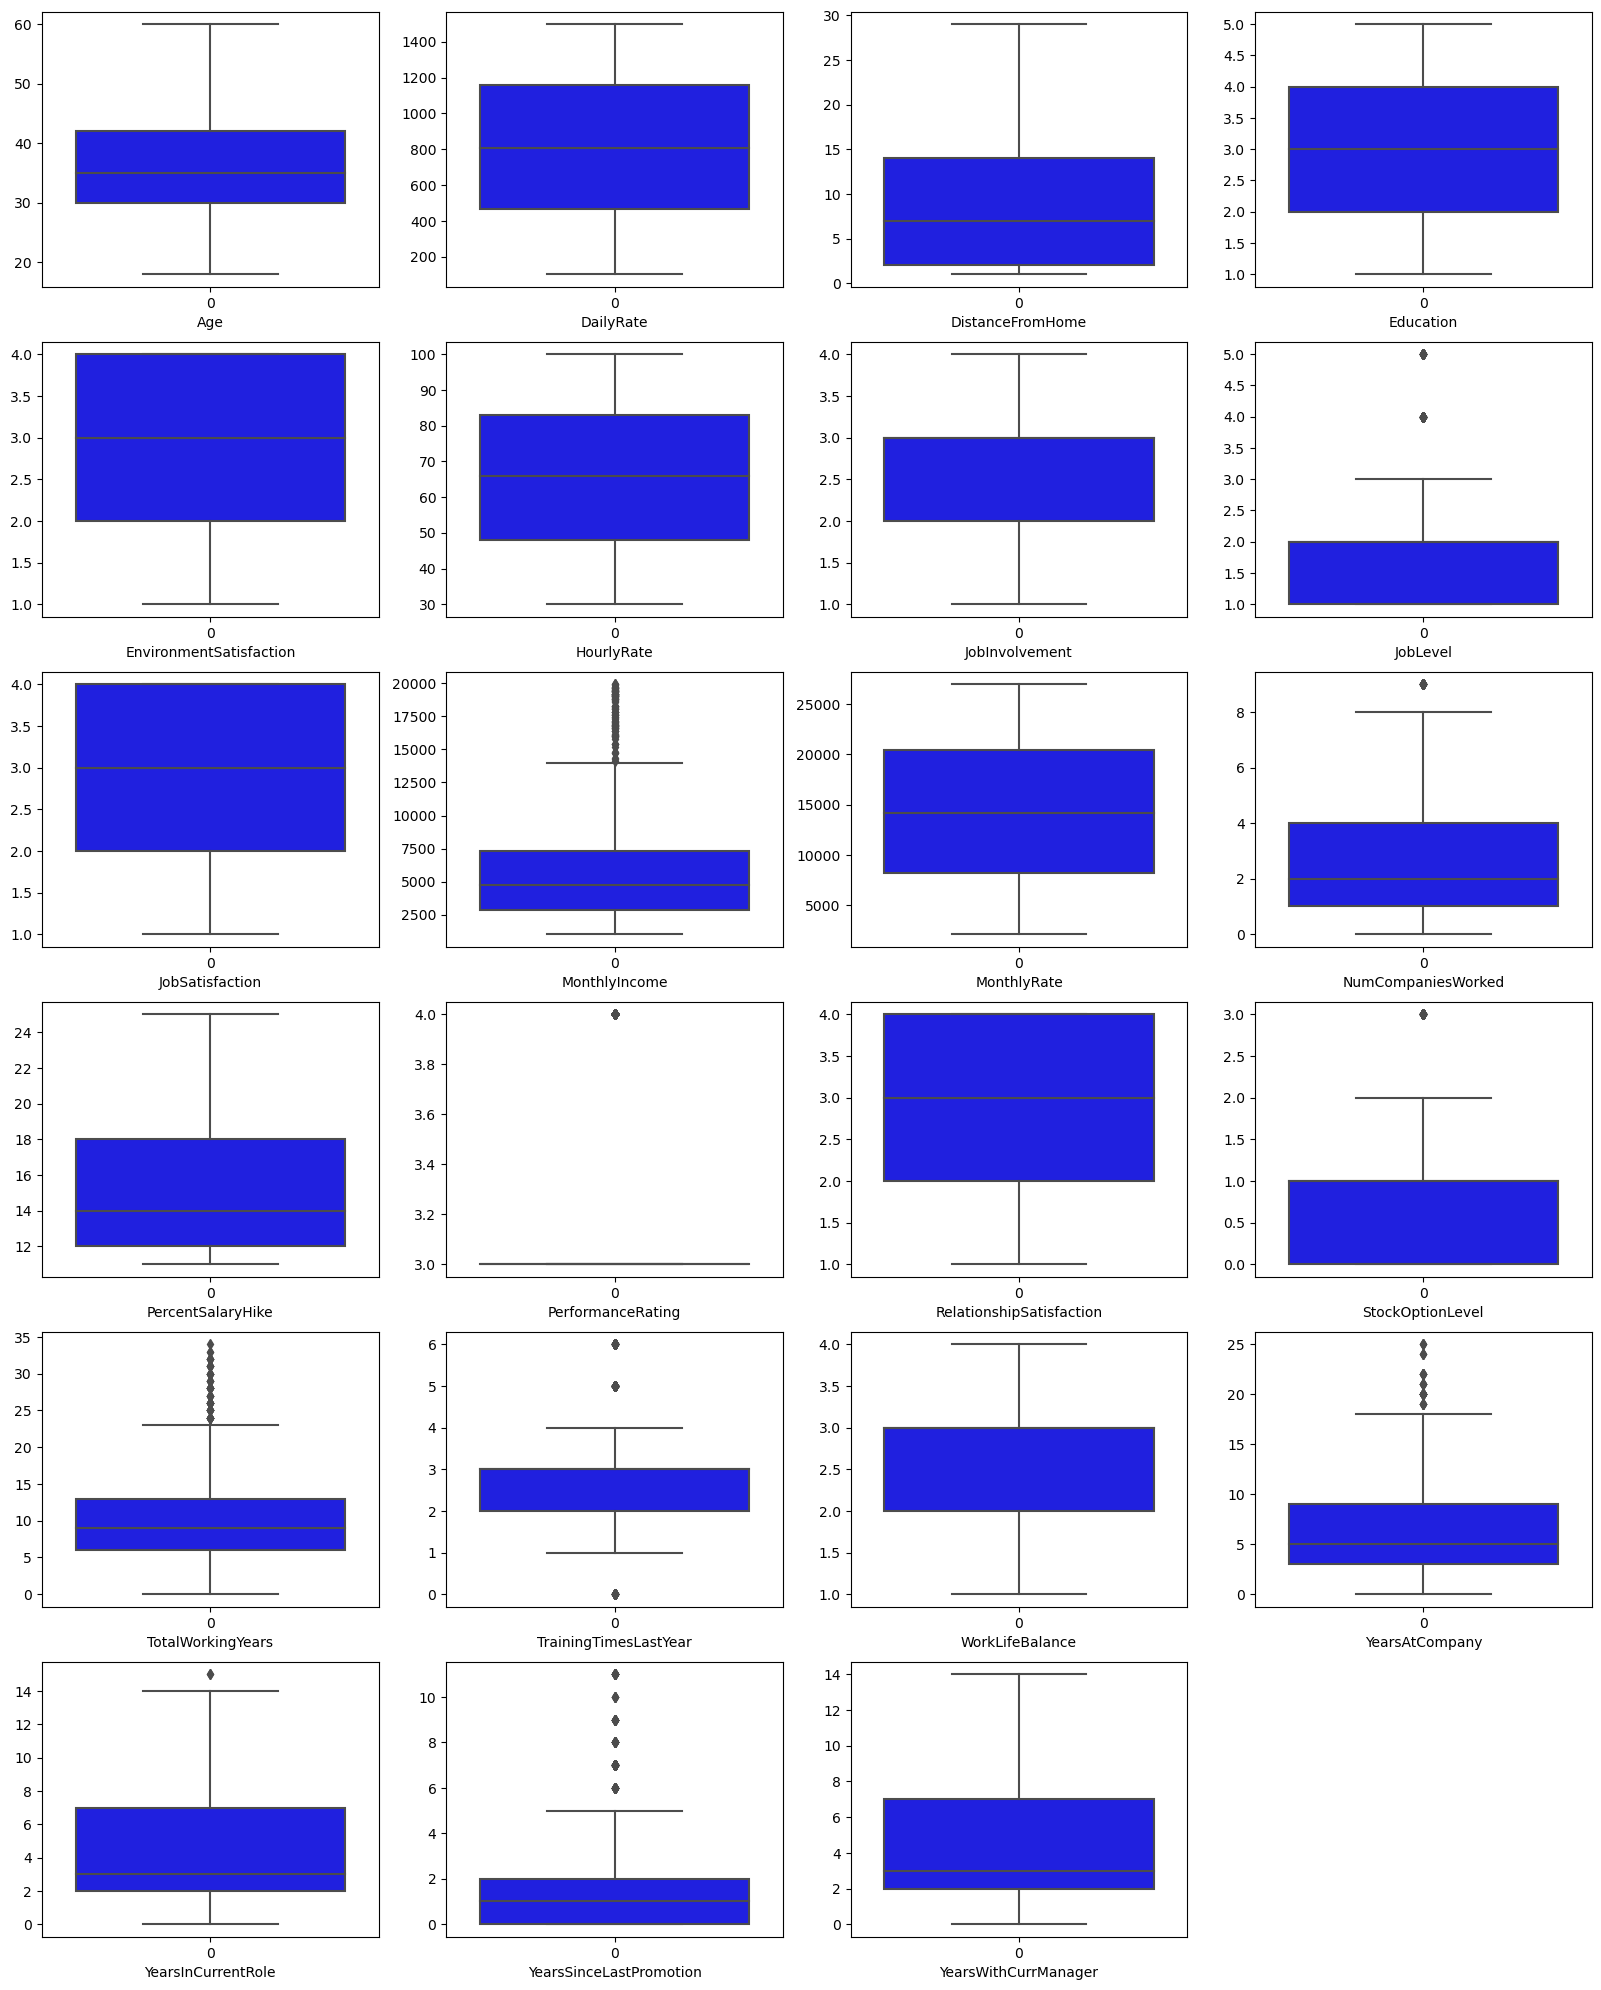

In [353]:
plt.figure(figsize=(20,25))
ptnum=1
for column in n_column:
    if ptnum<=24:
        ax=plt.subplot(6,4,ptnum)
        sns.boxplot(new_df[column],color='b')
        plt.xlabel(column)
    ptnum+=1
plt.show()

In [360]:
df.shape

(1470, 31)

In [361]:
new_df.shape


(1387, 31)

In [362]:
(1470-1387)/1470*100

5.646258503401361

In [363]:
Q1=feature_cols.quantile(0.25)

Q3=feature_cols.quantile(0.75)

IQR=Q3-Q1

iqrdf=df[~((df < (Q1-1.5*IQR)) | (df >(Q3 + 1.5*IQR))).any(axis=1)]


In [364]:
iqrdf.shape

(779, 31)

In [242]:
(1470-779)/1470*100

47.006802721088434

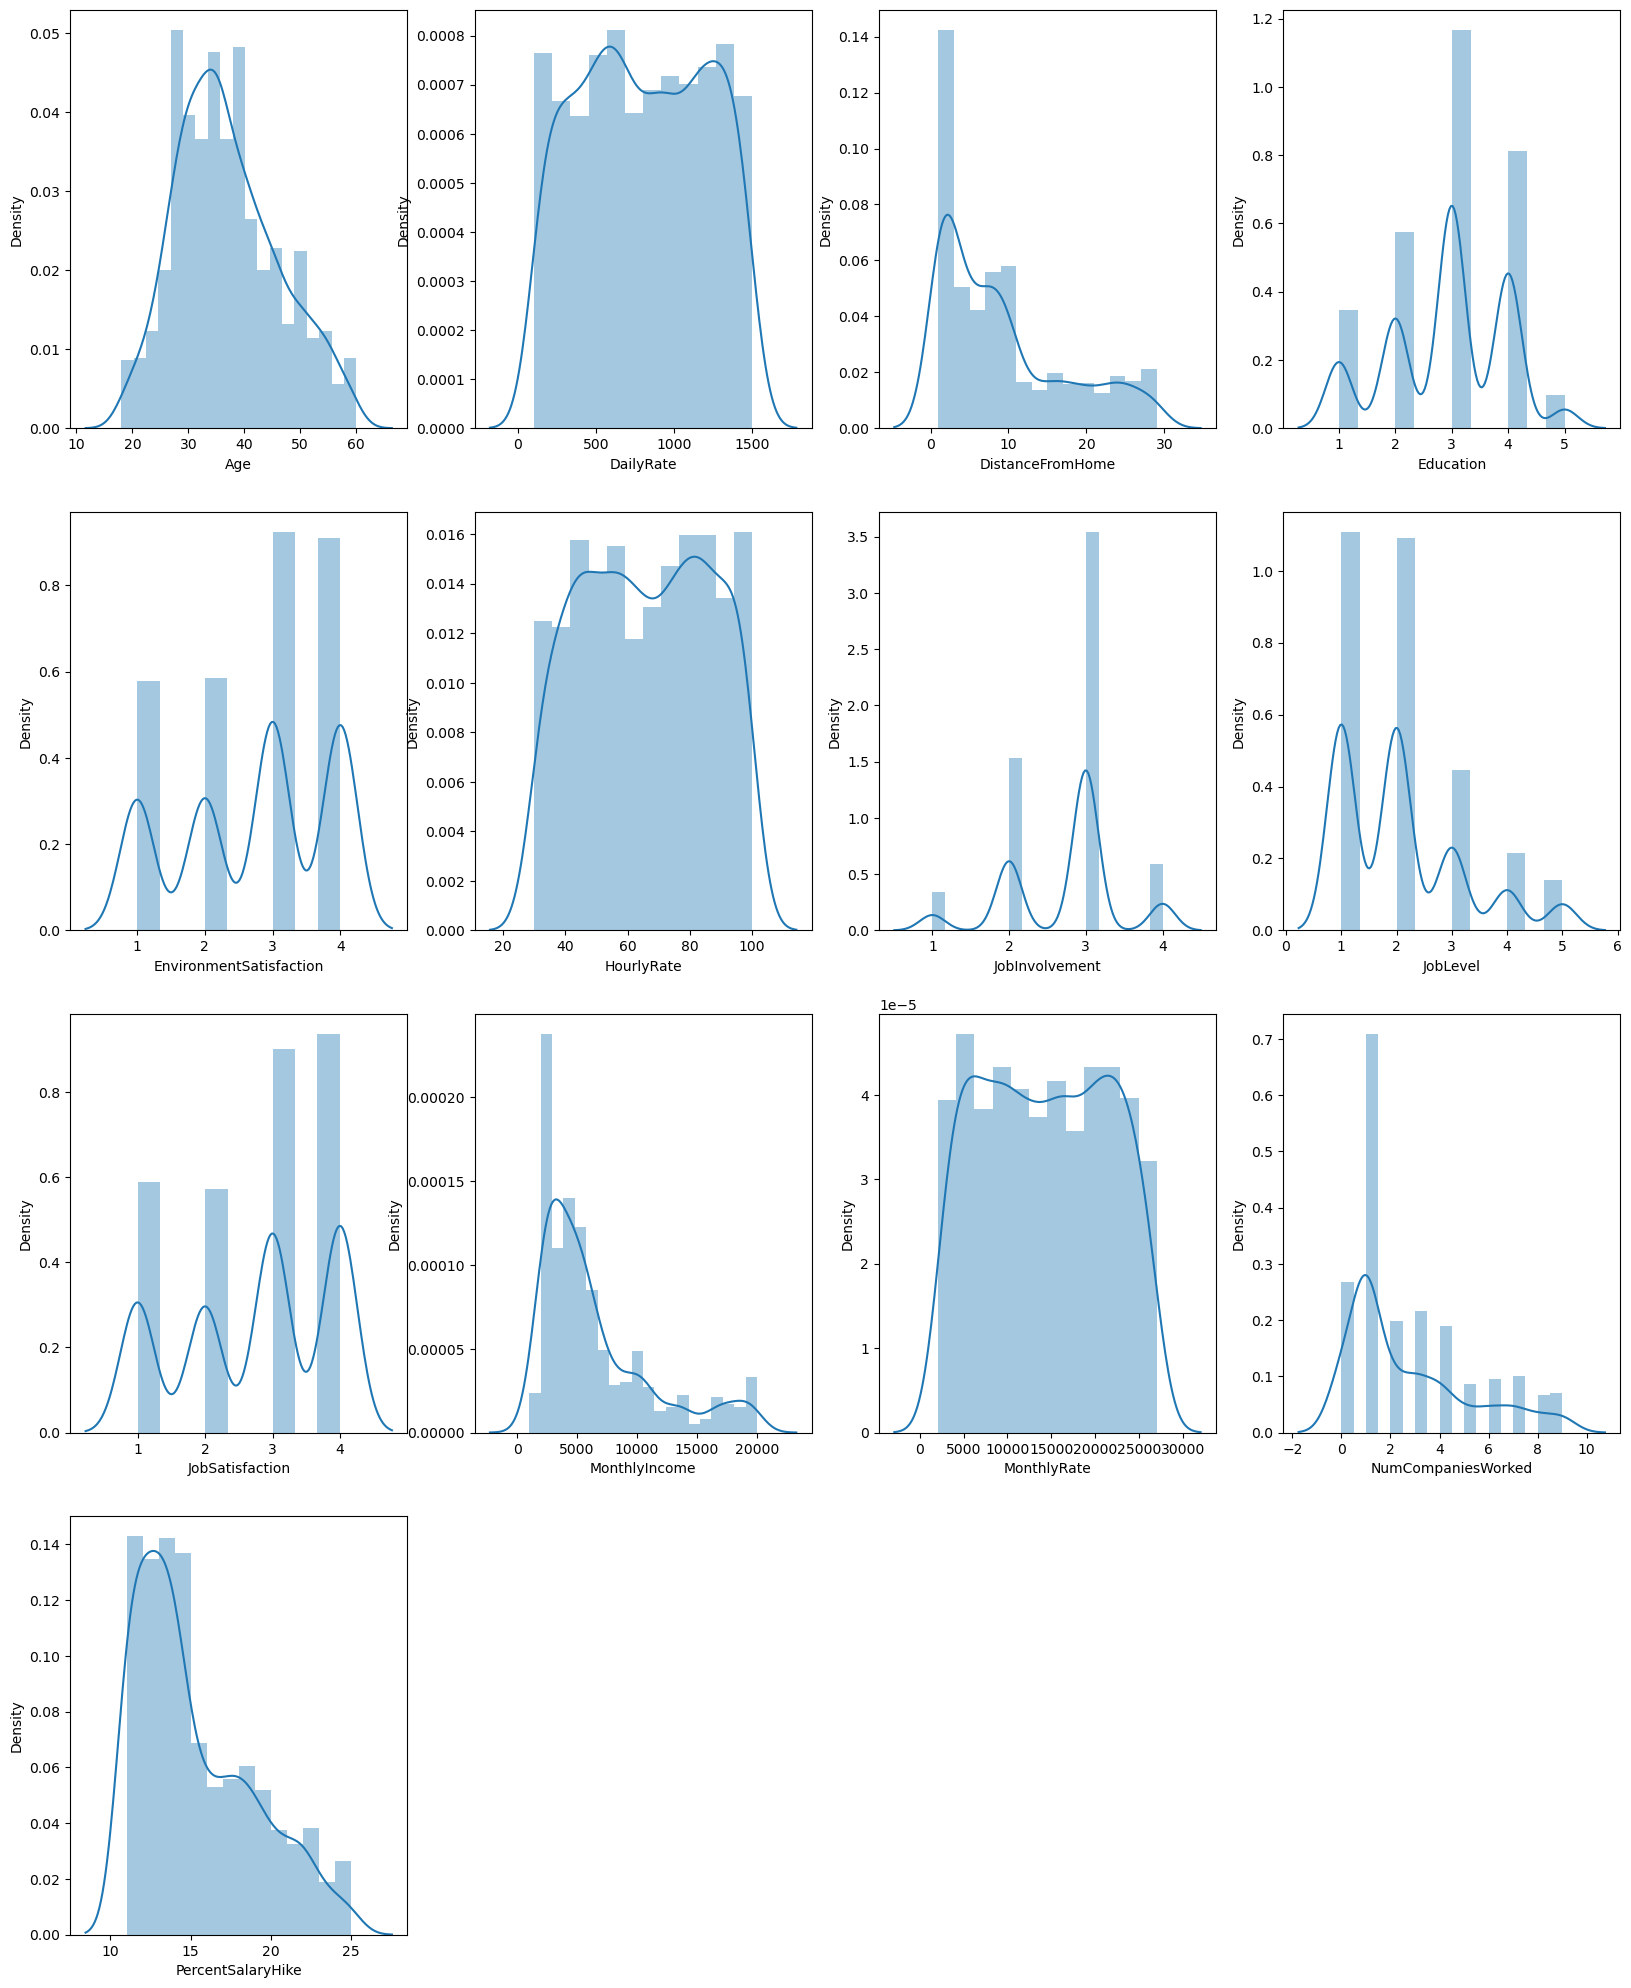

In [365]:
plt.figure(figsize=(20,25))
pltnum=1
for column in n_column:
    if pltnum <= 13:
        ax=plt.subplot(4,4,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column)
    pltnum+=1
plt.show()

In [366]:
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

In [367]:
skew_data=['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

In [368]:
from sklearn.preprocessing import PowerTransformer

In [369]:
scaler=PowerTransformer(method='yeo-johnson')
new_df[skew_data]=scaler.fit_transform(new_df[skew_data].values)
new_df[skew_data].head()

DistanceFromHome  JobLevel  MonthlyIncome  NumCompaniesWorked  \
0         -1.489968  0.349828       0.386674            1.620671   
1          0.244561  0.349828       0.144235           -0.561880   
2         -1.028366 -1.141761      -1.431153            1.273711   
3         -0.698191 -1.141761      -0.814425           -0.561880   
4         -1.028366 -1.141761      -0.504453            1.764103   

   PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0          -1.495549         -1.084263          -0.173231   
1           1.690425          0.548653           0.147620   
2           0.193797         -1.084263          -0.351153   
3          -1.495549         -1.084263          -0.173231   
4          -0.957525          0.548653          -0.544046   

   TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0              -2.608524        0.231837            0.290524   
1               0.217074        0.948319            1.006575   
2               0.217074       -2.156089           -1.571814   
3               0.217074        0.621429            1.006575   
4               0.217074       -0.933983           -0.390769   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -1.073534              0.582177  
1                 0.193168              1.018073  
2                -1.073534             -1.528426  
3                 1.027520             -1.528426  
4                 0.722874             -0.347871

In [248]:
new_df.skew()

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

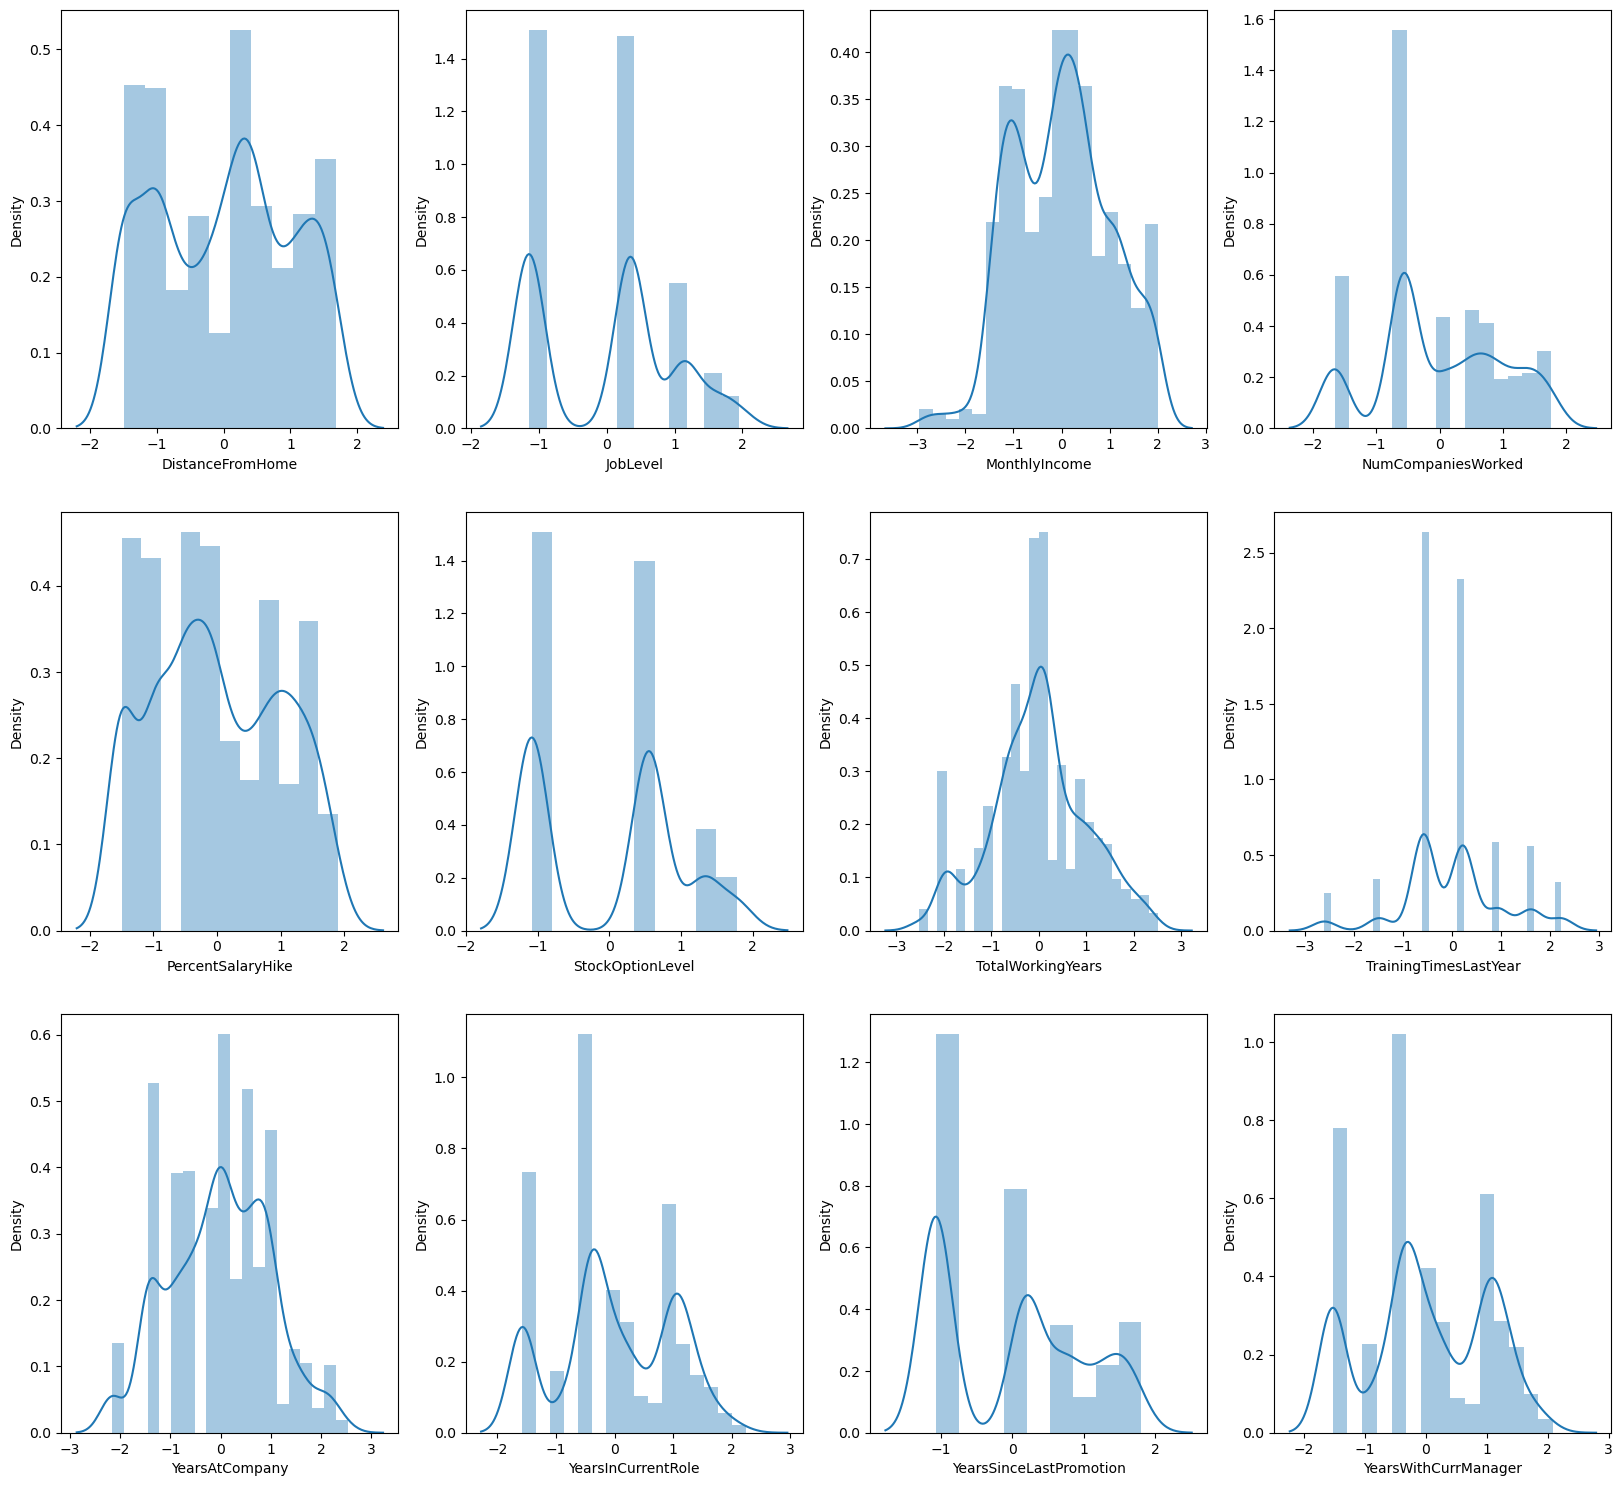

In [370]:
plt.figure(figsize=(20,25))
pltnum=1
for column in new_df[skew_data]:
    if pltnum <= 13:
        ax=plt.subplot(4,4,pltnum)
        sns.distplot(new_df[column])
        plt.xlabel(column)
    pltnum+=1
plt.show()

In [372]:
c_column=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[c_column]=new_df[c_column].apply(LE.fit_transform)
new_df[c_column]

Attrition  BusinessTravel  Department  EducationField  Gender  JobRole  \
0             1               2           2               1       0        7   
1             0               1           1               1       1        6   
2             1               2           1               4       1        2   
3             0               1           1               1       0        6   
4             0               2           1               3       1        2   
...         ...             ...         ...             ...     ...      ...   
1465          0               1           1               3       1        2   
1466          0               2           1               3       1        0   
1467          0               2           1               1       1        4   
1468          0               1           2               3       1        7   
1469          0               2           1               3       1        2   

      MaritalStatus  OverTime  
0                 2         1  
1                 1         0  
2                 2         1  
3                 1         1  
4                 1         0  
...             ...       ...  
1465              1         0  
1466              1         0  
1467              1         1  
1468              1         0  
1469              1         0  

[1387 rows x 8 columns]

In [373]:
new_df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159366        0.022340   0.021946   
Attrition                -0.159366   1.000000       -0.001041  -0.057220   
BusinessTravel            0.022340  -0.001041        1.000000  -0.004606   
DailyRate                 0.021946  -0.057220       -0.004606   1.000000   
Department               -0.038242   0.063637       -0.003521  -0.005398   
DistanceFromHome         -0.028793   0.080979       -0.015034  -0.003967   
Education                 0.198502  -0.032703       -0.010560  -0.018442   
EducationField           -0.032676   0.023585        0.022576   0.040645   
EnvironmentSatisfaction   0.014098  -0.112393        0.001183   0.033123   
Gender                   -0.039430   0.036252       -0.025364  -0.005242   
HourlyRate                0.025465  -0.001532        0.025424   0.014279   
JobInvolvement            0.036424  -0.133957        0.028261   0.048004   
JobLevel                  0.430414  -0.196464       -0.002398   0.015383   
JobRole                  -0.112957   0.064283        0.000213  -0.015437   
JobSatisfaction           0.011763  -0.114206       -0.032491   0.042698   
MaritalStatus            -0.104372   0.160960        0.018687  -0.074113   
MonthlyIncome             0.436543  -0.207280        0.028387   0.029530   
MonthlyRate               0.026954   0.014888       -0.010307  -0.029844   
NumCompaniesWorked        0.339436   0.047508        0.026929   0.033388   
OverTime                  0.034180   0.257237        0.022378   0.020294   
PercentSalaryHike         0.013248  -0.017523       -0.027934   0.028690   
PerformanceRating        -0.000617   0.010781       -0.018274   0.000574   
RelationshipSatisfaction  0.041744  -0.052344       -0.029660   0.004516   
StockOptionLevel          0.077833  -0.175081       -0.012732   0.047773   
TotalWorkingYears         0.634884  -0.220878        0.031888   0.043307   
TrainingTimesLastYear    -0.013707  -0.059071        0.011688   0.006581   
WorkLifeBalance          -0.016913  -0.062492       -0.014140  -0.044266   
YearsAtCompany            0.174149  -0.201954       -0.021107   0.005806   
YearsInCurrentRole        0.118454  -0.187047       -0.032472   0.020542   
YearsSinceLastPromotion   0.103938  -0.050986       -0.027478  -0.035403   
YearsWithCurrManager      0.114962  -0.186821       -0.033222   0.007098   

                          Department  DistanceFromHome  Education  \
Age                        -0.038242         -0.028793   0.198502   
Attrition                   0.063637          0.080979  -0.032703   
BusinessTravel             -0.003521         -0.015034  -0.010560   
DailyRate                  -0.005398         -0.003967  -0.018442   
Department                  1.000000          0.037660   0.012846   
DistanceFromHome            0.037660          1.000000   0.003595   
Education                   0.012846          0.003595   1.000000   
EducationField              0.013432          0.011891  -0.038017   
EnvironmentSatisfaction    -0.014540         -0.012075  -0.026223   
Gender                     -0.030618          0.010557  -0.019166   
HourlyRate                 -0.002412          0.014926   0.010848   
JobInvolvement             -0.024040          0.036805   0.041343   
JobLevel                    0.203244          0.024038   0.104270   
JobRole                     0.678627          0.009353   0.015140   
JobSatisfaction             0.029521         -0.019334  -0.007219   
MaritalStatus               0.052086         -0.027275  -0.012726   
MonthlyIncome               0.154056          0.000545   0.111594   
MonthlyRate                 0.022741          0.048976  -0.018540   
NumCompaniesWorked         -0.034028         -0.010318   0.137958   
OverTime                    0.014908          0.036524  -0.017166   
PercentSalaryHike          -0.015322          0.034946  -0.002478   
PerformanceRating          -0.039364          0.013212  -0.023487   
Relationshi

<Axes: >

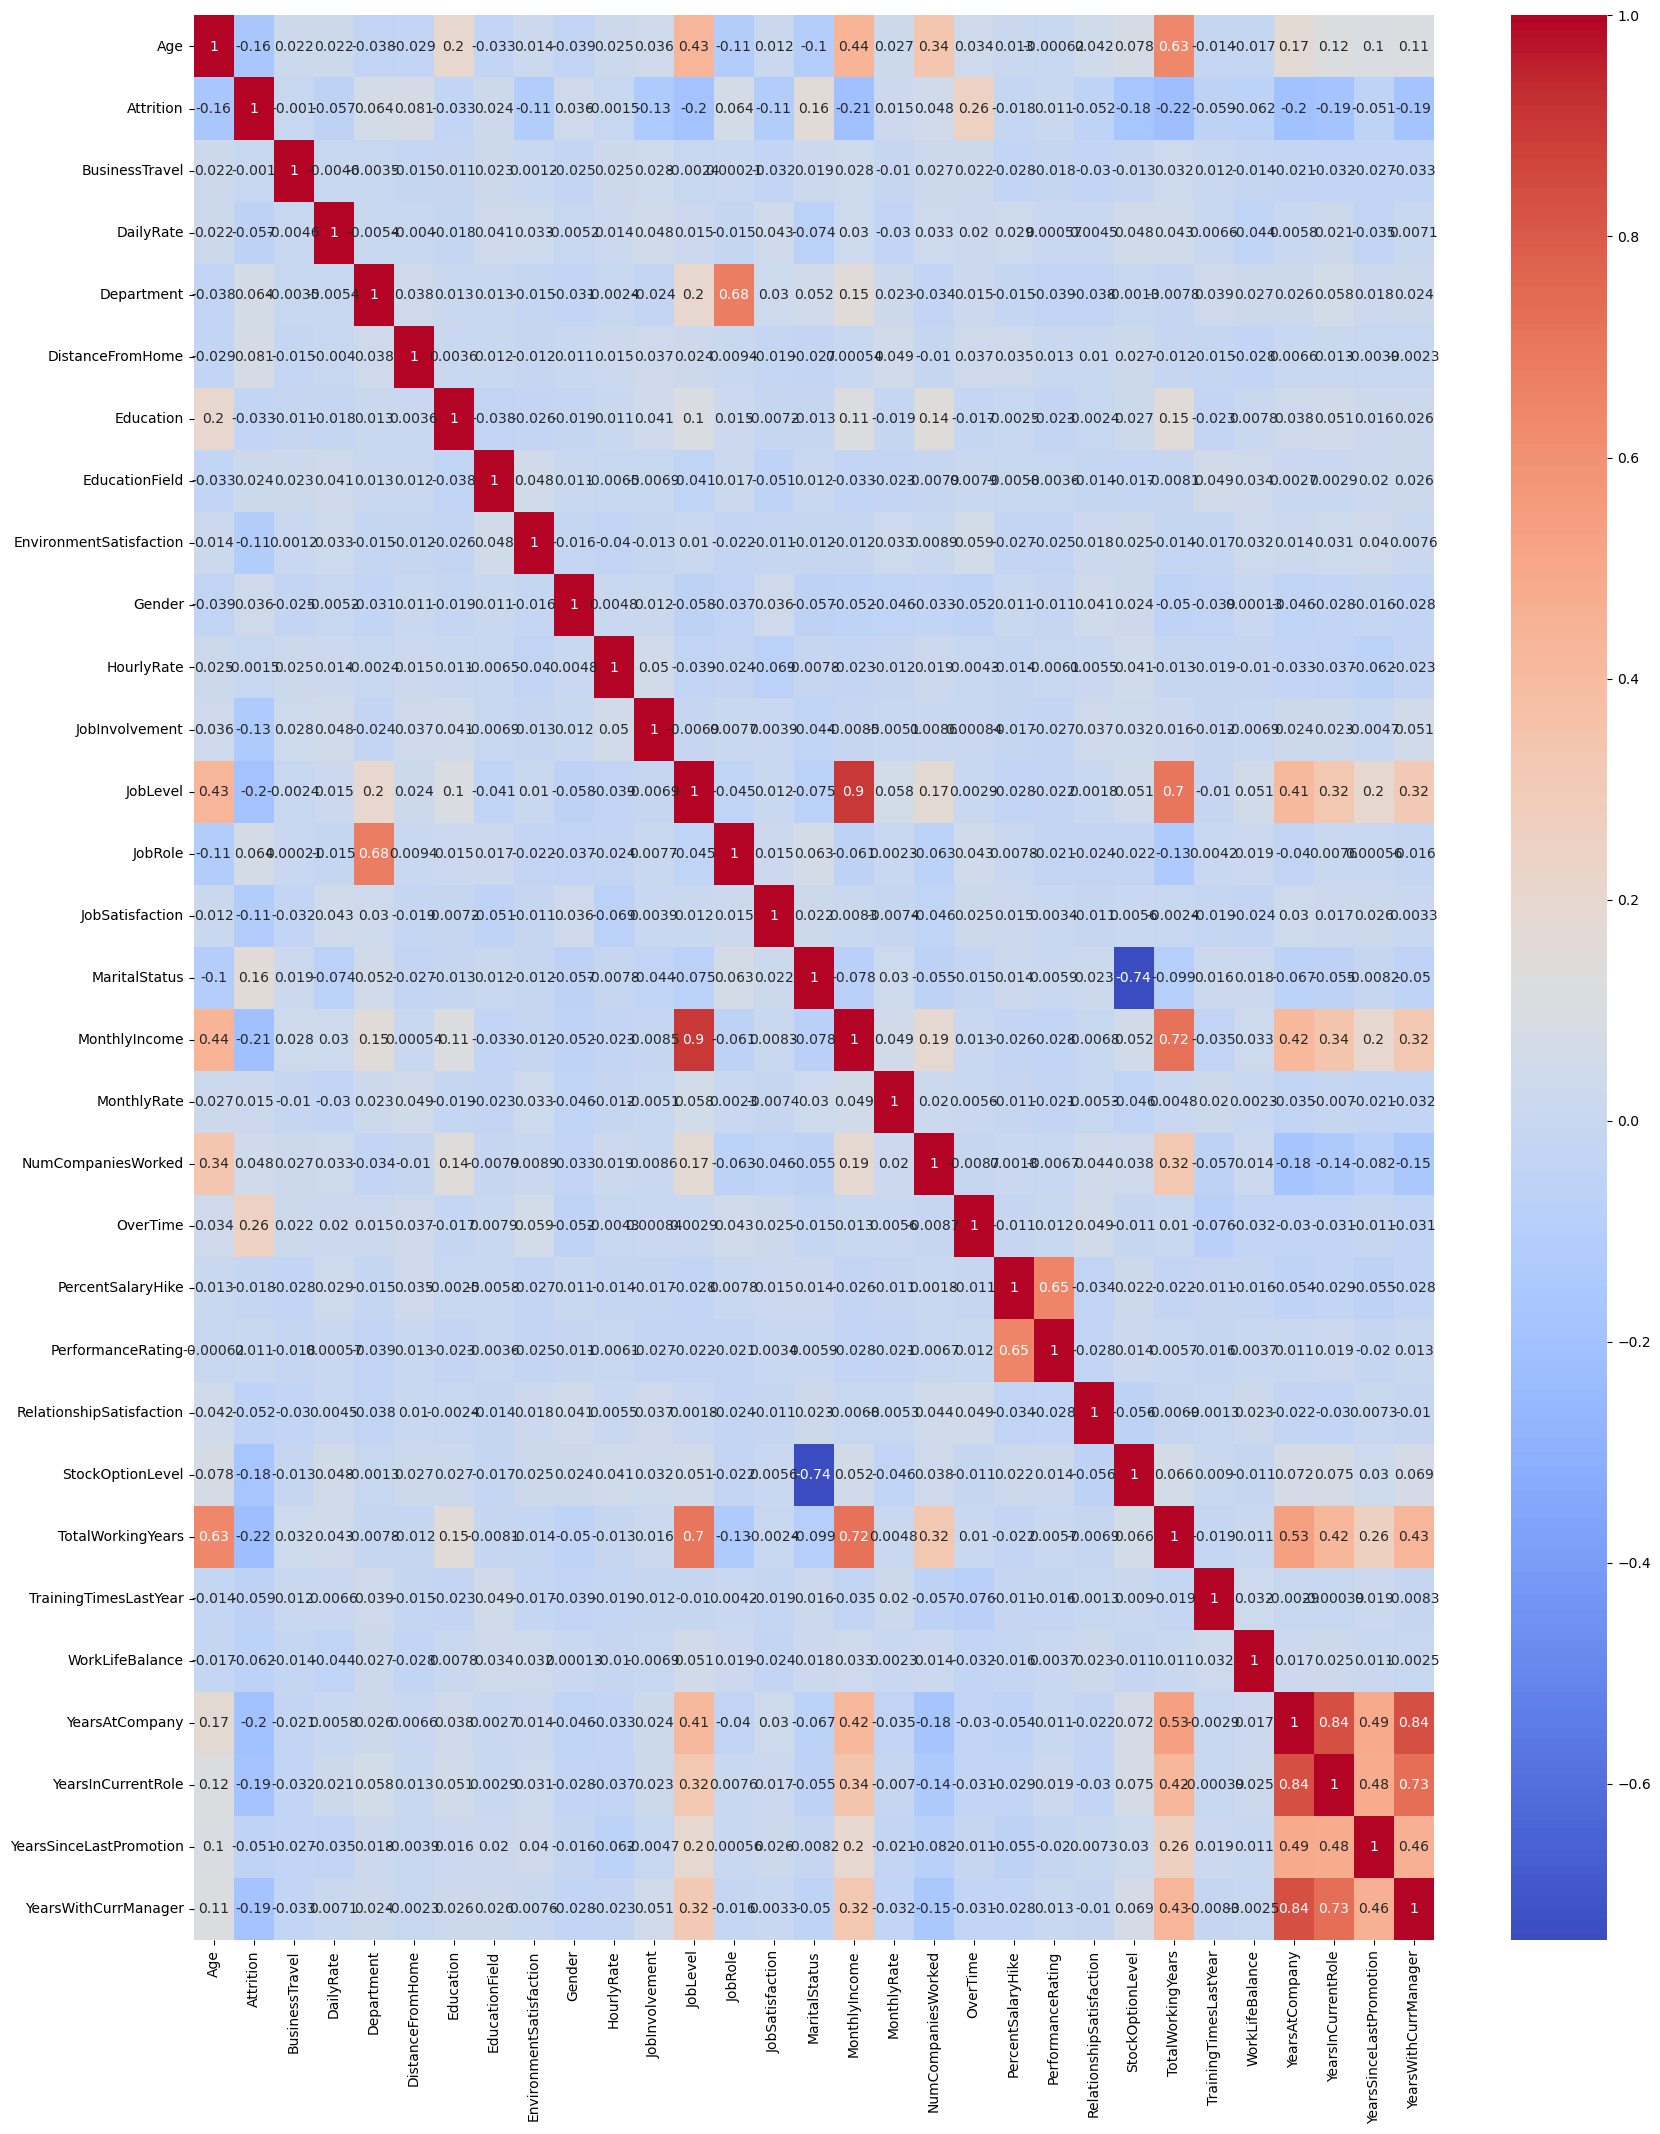

In [374]:
plt.figure(figsize=(20,25))
sns.heatmap(new_df.corr(),annot=True,cmap='coolwarm')

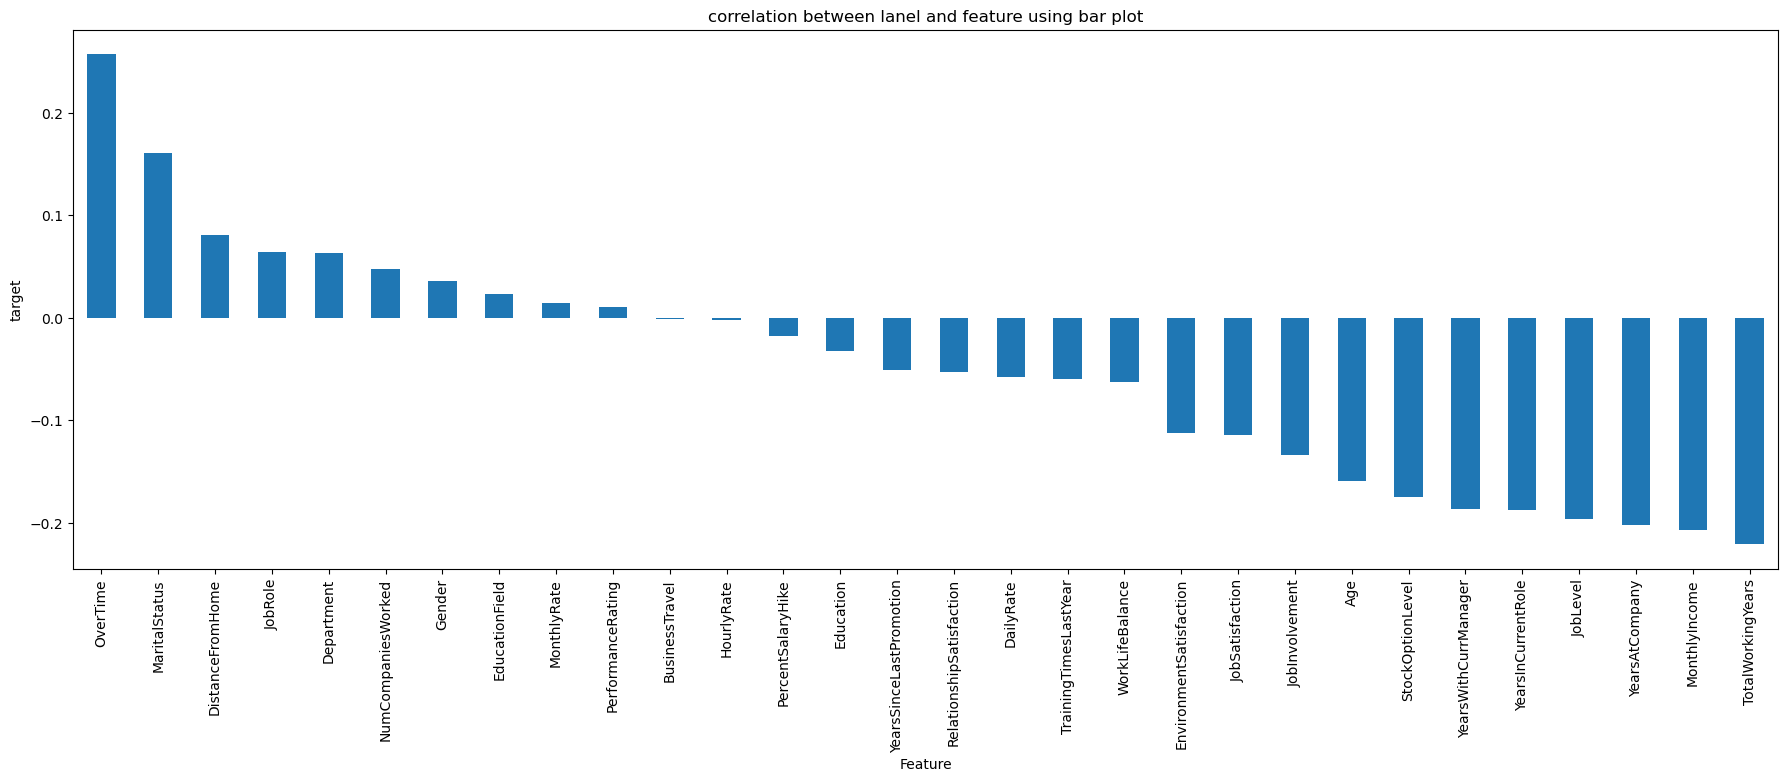

In [375]:
plt.figure(figsize=(22,7))
new_df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('target')
plt.title('correlation between lanel and feature using bar plot')
plt.show()


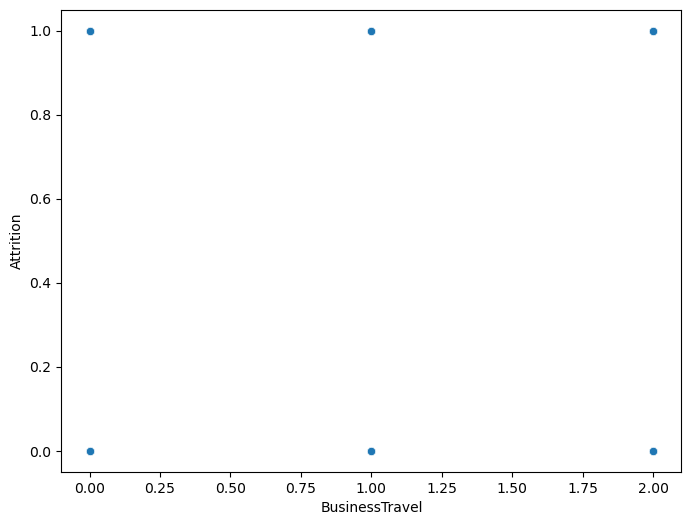

In [376]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='BusinessTravel',y='Attrition',data=new_df)
plt.show()

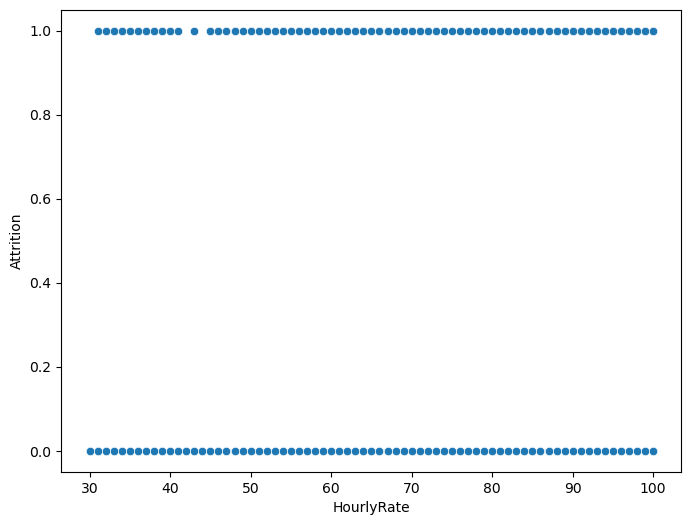

In [377]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='HourlyRate',y='Attrition',data=new_df)
plt.show()

In [378]:
new_df.drop('BusinessTravel',axis=1,inplace=True)
new_df.drop('HourlyRate',axis=1,inplace=True)
x=new_df.drop('Attrition',axis=1)
y=new_df['Attrition']
print(x.shape)
print(y.shape)

(1387, 28)
(1387,)


In [379]:

#!pip install imblearn

In [380]:
#!pip install -U imbalanced-learn


In [381]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/

In [382]:
!pip install imblearn

In [383]:
#from imblearn import over_sampling, under_sampling 
from collections import Counter

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

#from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y=SM.fit_resample(x,y)
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [389]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.707981   0.797785    1.595628         -1.651887  -0.756605   
1     1.643340  -1.304142   -0.367961          0.195306  -1.782540   
2     0.240302   1.489915   -0.367961         -1.160302  -0.756605   
3    -0.227378   1.538440   -0.367961         -0.808681   1.295265   
4    -0.928897  -0.507300   -0.367961         -1.160302  -1.782540   
...        ...        ...         ...               ...        ...   
2311 -0.461218  -1.255617   -0.367961          0.800311   1.295265   
2312 -0.811977  -1.051298   -0.367961          1.040378  -1.782540   
2313 -0.461218  -0.857195   -0.367961         -0.256889   0.269330   
2314  0.824901   0.544941   -0.367961          0.049342  -0.756605   
2315  1.175661   1.002104   -0.367961          0.511680  -0.756605   

      EducationField  EnvironmentSatisfaction    Gender  JobInvolvement  \
0          -0.925262                -0.429897 -1.047772        0.657160   
1          -0.925262                 0.498007  0.954406       -0.689727   
2           1.462821                 1.425910  0.954406       -0.689727   
3          -0.925262                 1.425910 -1.047772        0.657160   
4           0.666793                -1.357800  0.954406        0.657160   
...              ...                      ...       ...             ...   
2311       -0.129234                 0.498007  0.954406       -0.689727   
2312        1.462821                 0.498007 -1.047772       -0.689727   
2313       -0.925262                -0.429897  0.954406        0.657160   
2314       -0.925262                 0.498007 -1.047772        0.657160   
2315       -0.129234                -0.429897  0.954406        0.657160   

      JobLevel  ...  PerformanceRating  RelationshipSatisfaction  \
0     0.557901  ...          -0.334452                 -1.402257   
1     0.557901  ...           2.989969                  1.429976   
2    -1.038767  ...          -0.334452                 -0.458179   
3    -1.038767  ...          -0.334452                  0.485898   
4    -1.038767  ...          -0.334452                  1.429976   
...        ...  ...                ...                       ...   
2311  0.557901  ...          -0.334452                  0.485898   
2312  0.636704  ...          -0.334452                 -1.402257   
2313 -0.471151  ...          -0.334452                  0.485898   
2314 -0.307310  ...          -0.334452                 -0.458179   
2315  0.136654  ...          -0.334452                 -0.458179   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.954784           0.011121              -2.756032   
1             0.765802           0.342340               0.281509   
2            -0.954784          -0.172549               0.281509   
3            -0.954784           0.011121               0.281509   
4             0.765802          -0.371674               0.281509   
...                ...                ...                    ...   
2311          0.589464           0.456373               0.281509   
2312         -0.954784          -0.449860              -0.981260   
2313          1.050273           0.010494              -0.270720   
2314         -0.022423           0.807997              -2.756032   
2315         -0.954784          -0.217388              -0.132056   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.124444        0.428115            0.480439   
1            0.543784        1.179899            1.241098   
2            0.543784       -2.077466           -1.497918   
3            0.543784        0.836903            1.241098   
4            0.543784       -0.795145           -0.243297   
...               ...             ...                 ...   
2311        -0.790330        0.971717            0.331749   
2312        -0.790330        0.168711            0.386533   
2313        -2.124444       -0.093017           -0.243297   
2314        -2.124444    

In [390]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns
vif

VIF values                  Features
0     1.882295                       Age
1     1.042620                 DailyRate
2     2.012229                Department
3     1.031926          DistanceFromHome
4     1.077091                 Education
5     1.045962            EducationField
6     1.079267   EnvironmentSatisfaction
7     1.063114                    Gender
8     1.107833            JobInvolvement
9     5.763520                  JobLevel
10    1.871271                   JobRole
11    1.082232           JobSatisfaction
12    2.136367             MaritalStatus
13    5.790020             MonthlyIncome
14    1.056870               MonthlyRate
15    1.417580        NumCompaniesWorked
16    1.033028                  OverTime
17    1.497130         PercentSalaryHike
18    1.494516         PerformanceRating
19    1.072682  RelationshipSatisfaction
20    2.156820          StockOptionLevel
21    4.163154         TotalWorkingYears
22    1.033926     TrainingTimesLastYear
23    1.063139           WorkLifeBalance
24    6.935033            YearsAtCompany
25    4.113012        YearsInCurrentRole
26    1.497069   YearsSinceLastPromotion
27    3.820712      YearsWithCurrManager

In [391]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [392]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is ',maxAccu ,'on Random_state ',maxRS)

Maximum r2 score is  0.8762589928057554 on Random_state  160


In [393]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=6)

In [394]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [395]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

preDTC=DTC.predict(x_test)

print(accuracy_score(y_test,preDTC))
print(confusion_matrix(y_test,preDTC))
print(classification_report(y_test,preDTC))

0.8666666666666667
[[13  3]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.81      0.93      0.87        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



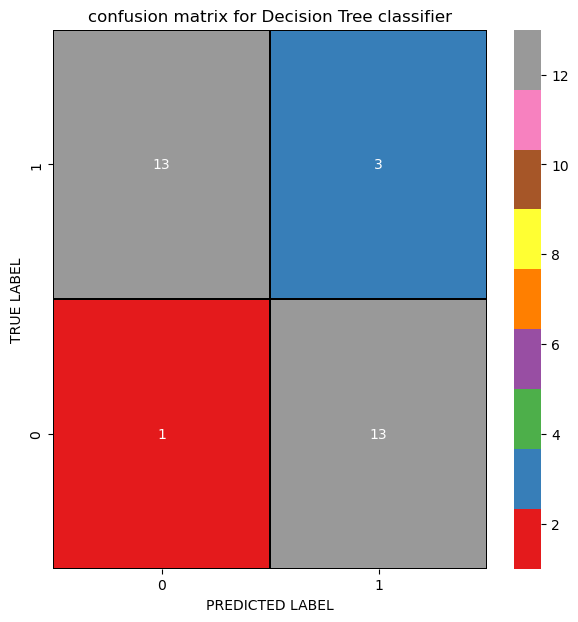

In [396]:
cm= confusion_matrix(y_test, preDTC)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="Set1", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Decision Tree classifier")
plt.show()


In [397]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

preRFC=RFC.predict(x_test)

print(accuracy_score(y_test,preRFC))
print(confusion_matrix(y_test,preRFC))
print(classification_report(y_test,preRFC))

0.9333333333333333
[[15  1]
 [ 1 13]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



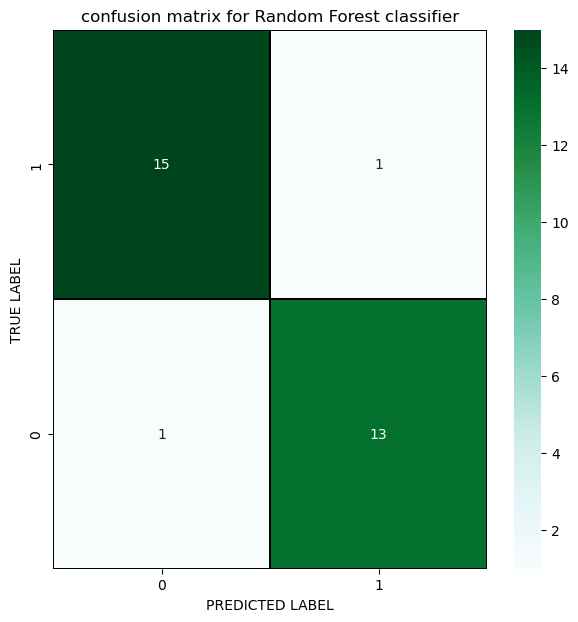

In [398]:
cm= confusion_matrix(y_test, preRFC)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Random Forest classifier")
plt.show()


In [399]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

predLR=LR.predict(x_test)

print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7
[[ 9  7]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.63      0.86      0.73        14

    accuracy                           0.70        30
   macro avg       0.72      0.71      0.70        30
weighted avg       0.73      0.70      0.69        30



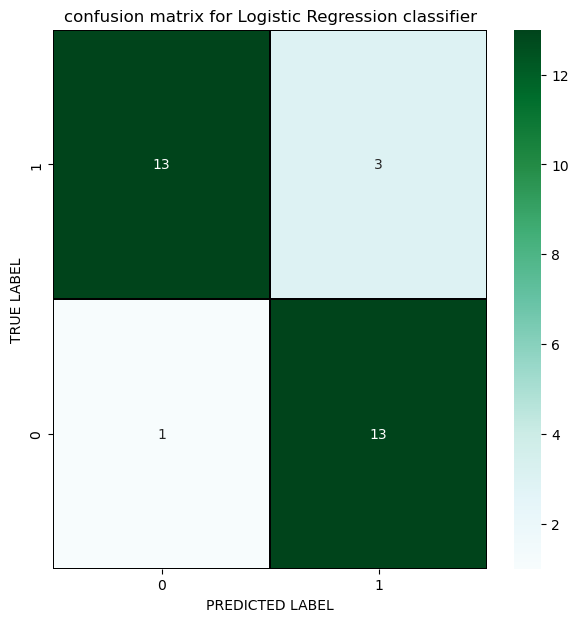

In [400]:
cm= confusion_matrix(y_test, preDTC)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Logistic Regression classifier")
plt.show()


In [401]:
svc = SVC()
svc.fit(x_train,y_train)

predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8666666666666667
[[14  2]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.86      0.86      0.86        14

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30



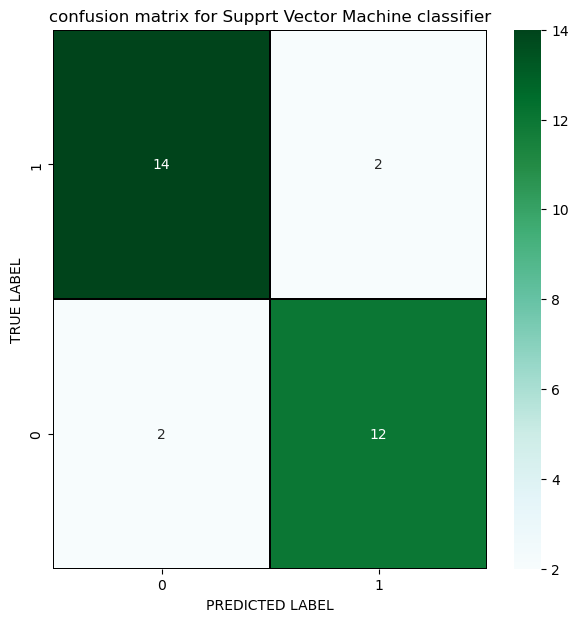

In [402]:
cm= confusion_matrix(y_test, predsvc)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Supprt Vector Machine classifier")
plt.show()


In [403]:
knn = KNN()
knn.fit(x_train,y_train)

preknn=knn.predict(x_test)

print(accuracy_score(y_test,preknn))
print(confusion_matrix(y_test,preknn))
print(classification_report(y_test,preknn))

0.7666666666666667
[[ 9  7]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.67      1.00      0.80        14

    accuracy                           0.77        30
   macro avg       0.83      0.78      0.76        30
weighted avg       0.84      0.77      0.76        30



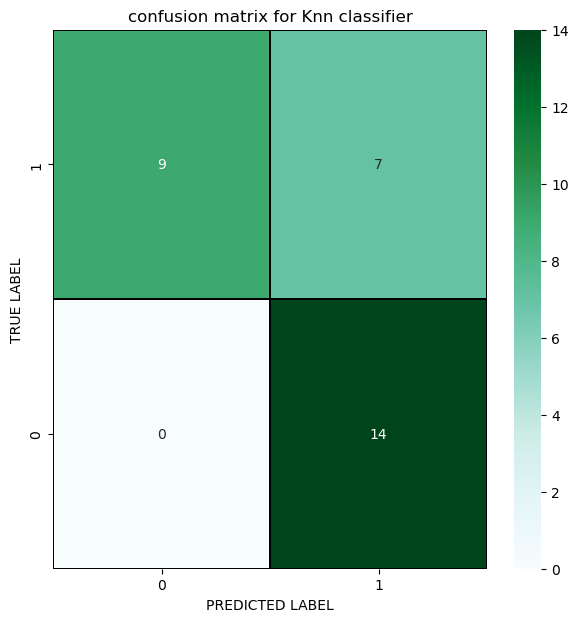

In [404]:
cm= confusion_matrix(y_test, preknn)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Knn classifier")
plt.show()

In [405]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

preGB=GB.predict(x_test)

print(accuracy_score(y_test,preGB))
print(confusion_matrix(y_test,preGB))
print(classification_report(y_test,preGB))

0.9
[[15  1]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



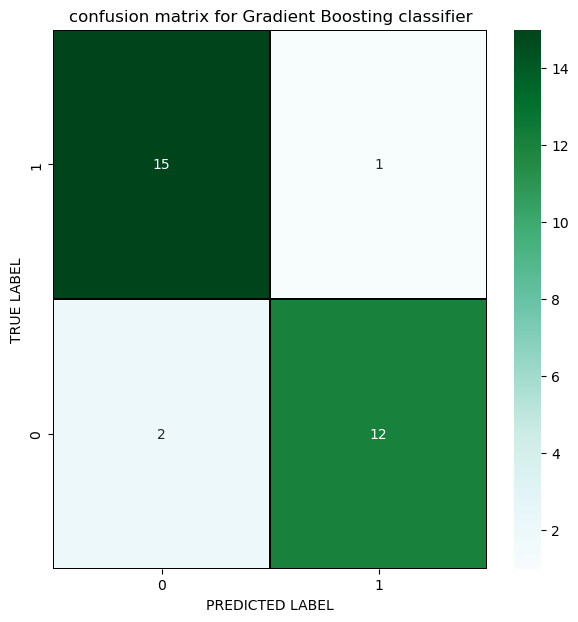

In [406]:
cm= confusion_matrix(y_test, preGB)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Gradient Boosting classifier")
plt.show()

In [407]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

preABC=ABC.predict(x_test)

print(accuracy_score(y_test,preABC))
print(confusion_matrix(y_test,preABC))
print(classification_report(y_test,preABC))

0.9333333333333333
[[14  2]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



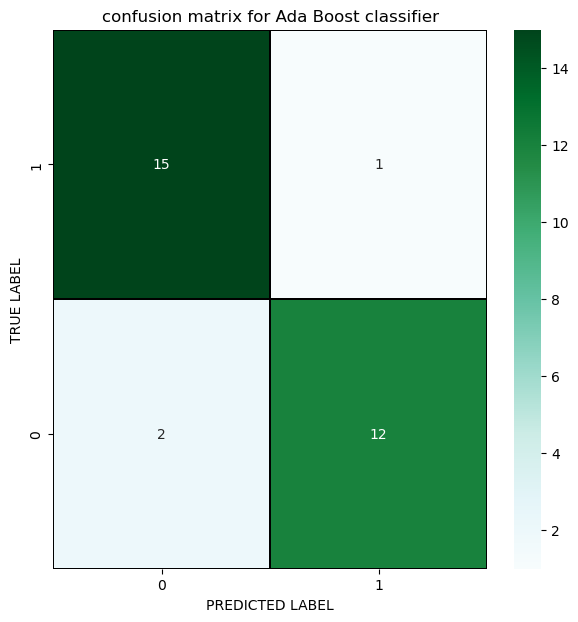

In [408]:
cm= confusion_matrix(y_test, preGB)

x_axis_label= ["0","1"]
y_axis_label= ["1","0"]

f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot=True, linewidths=.2,linecolor='black', fmt='.0f', ax=ax, cmap="BuGn", xticklabels=x_axis_label, yticklabels=y_axis_label)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("confusion matrix for Ada Boost classifier")
plt.show()

In [409]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(DTC,x,y,cv=5).mean())
print(cross_val_score(RFC,x,y,cv=5).mean())
print(cross_val_score(LR,x,y,cv=5).mean())
print(cross_val_score(svc,x,y,cv=5).mean())
print(cross_val_score(knn,x,y,cv=5).mean())
print(cross_val_score(GB,x,y,cv=5).mean())
print(cross_val_score(ABC,x,y,cv=5).mean())

0.820905637893796
0.8951999702092799
0.7997039547181053
0.8593263573396888
0.8212500930960006
0.8723402472629775
0.850733596484695


In [410]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors':[2,3,4,5,6],
            'weights':['uniform','distance'],
            'leaf_size':[10,100],
            'algorithm':['auto','ball_tree','kd_tree','brute']
           }
GCV=GridSearchCV(KNN(),parameters,cv=5)


In [411]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [412]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'uniform'}

In [413]:
model=KNN(algorithm='auto', leaf_size=10, n_neighbors= 2, weights='uniform')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.0


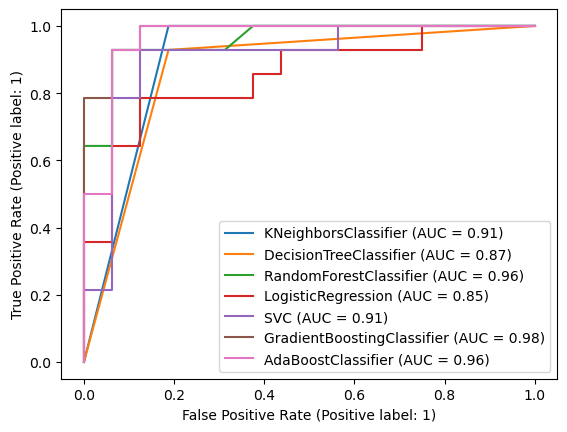

In [414]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import RocCurveDisplay
disp=RocCurveDisplay.from_estimator(model,x_test,y_test)
RocCurveDisplay.from_estimator(DTC,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(RFC,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(LR,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svc,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(GB,x_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(ABC,x_test, y_test, ax=disp.ax_)

plt.show()

In [415]:
import joblib
joblib.dump(model,"Attrition.pk1")

['Attrition.pk1']

In [416]:
model=joblib.load('Attrition.pk1')
prediction=model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [417]:
a=np.array(y_test)
df_final=pd.DataFrame({"Original":a, "Predicted":prediction}, index=range(len(a)))
df_final


Original  Predicted
0          0          0
1          1          1
2          1          1
3          0          1
4          0          0
5          1          1
6          1          1
7          0          0
8          0          0
9          1          1
10         1          1
11         1          1
12         1          1
13         1          1
14         0          0
15         1          1
16         1          1
17         1          1
18         1          1
19         0          0
20         0          0
21         0          0
22         0          1
23         1          1
24         0          0
25         0          0
26         0          0
27         0          0
28         0          0
29         0          1

<function matplotlib.pyplot.show(close=None, block=None)>

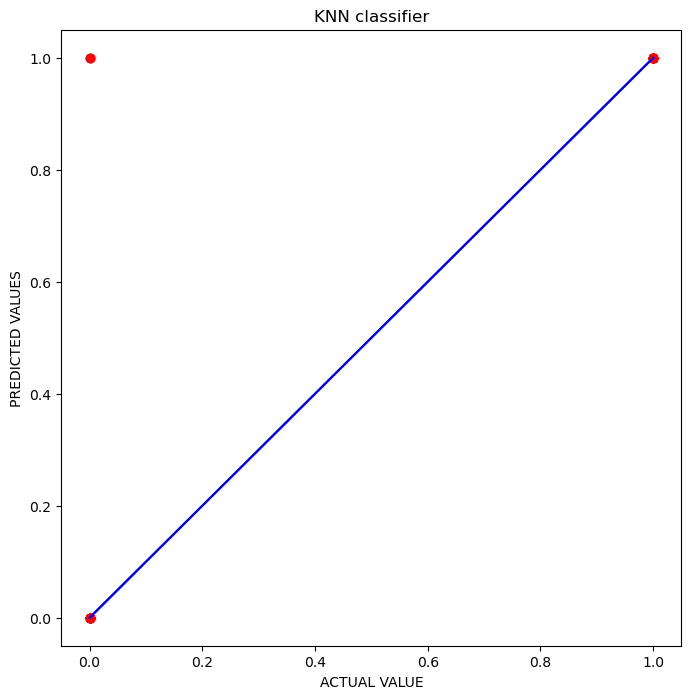

In [419]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction,c='r')
plt1=(max(prediction)), max(y_test)
plt2=(min(prediction)), min(y_test)
plt.plot([plt1,plt2], [plt1,plt2], 'b-')
plt.xlabel('ACTUAL VALUE')
plt.ylabel('PREDICTED VALUES')
plt.title('KNN classifier')
plt.show